# Project - Bank Churn Prediction
---

## Context:

- Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective:

- Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Data Information

- The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

- The detailed data dictionary is given below:

**Customer Details**

* CustomerId: Unique ID which is assigned to each customer
* Surname: Last name of the customer 
* CreditScore: It defines the credit history of the customer.  
* Geography: A customer’s location    
* Gender: It defines the Gender of the customer   
* Age: Age of the customer     
* Tenure: Number of years for which the customer has been with the bank
* NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
* Balance: Account balance
* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
* EstimatedSalary: Estimated salary 
* isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
* Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
    * 0=No ( Customer did not leave the bank )
    * 1=Yes ( Customer left the bank )
 

---

<a id="summary_home"></a>
## Table of Contents (TOC)


##### - *[Importing Packages](#import)*

##### - *[Unwrapping Customer Information](#unwrap)*
- *[Data Description](#datadesc)*

##### - *[Data Pre-Processing & Sanity Checks](#preprocess)*

##### - *[Summary of Data Analysis](#dataanalysis1)*

##### - *[EDA Analysis](#edaanalysis)*
- *[Insights from Categorical Data](#inCategory1)*
- *[Insights from Numerical Data](#inNumber1)*
- *[Univariate Analysis](#UnivariateAnalysis1)*
	- Summary provided under each feature chart
- *[Bivariate Analysis](#bivariate)*
    - *[Categorical Data vs Exited Summary](#BivariateCat)*
    - *[Numerical Data vs Exited Summary](#BivariateNum)*
- *[Correlation Summary](#BivariateAnalysis1)*
- *[Multivariate Analysis](#multivariate)*    

##### - *[Model Building](#model)*
- *[Data preparation for Modeling](#prepmodel)*
- *[Model evaluation criterion](#evaluation1)*

##### - *[Model Analysis](#modelorgdata)*
- *[Model 1 - Basic](#model1)*
- *[Model 2 - Basic with Early Stopping Tuning](#model2)*
- *[Model 3 - SGD with Relu Function, Dropout & BatchNorm. Tuning](#model3)*
- *[Model 4 - Adagrad with TanH Function, Dropout & BatchNorm. Tuning](#model4)*
- *[Model 5 - RMSProp with ReLu Function](#model5)*
- *[Model 6 - Adam with TanH Function, Dropout & BatchNorm. Tuning](#model6)*
- *[Model 7 - Adam with ReLu Function, Dropout & BatchNorm. Tuning](#model7)*

##### - *[Model Performance Comparison](#modelcomp)*

##### - *[Recommendations](#recommend1)*


---

<a id='import'> </a>

## Importing required Packages: 
*[Click to return to TOC](#summary_home)*

---

In [133]:
# Importing the Python Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
from IPython.display import Image

# Importing libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Used for Ignore warnings. When we generate the output, then we can use this ignore warning
import warnings

warnings.filterwarnings("ignore")

# To be used for missing value imputation
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# this will help in making the Python code more structured automatically (good coding practice)
!pip install nb-black
%reload_ext nb_black

# Command to tell Python to actually display the graphs
%matplotlib inline

# let's start by installing plotly
!pip install plotly

# importing plotly
import plotly.express as px


# Command to hide the 'already satisfied' warnining from displaying
%pip install keras | grep -v 'already satisfied'

# Constant for making bold text
boldText = "\033[1m"

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 500)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to build Bagging model
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# to build Boosting model
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option("mode.chained_assignment", None)

# To build model for prediction
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
# To tune different models
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Install library using
# In jupyter notebook
# !pip install shap

# or
# In anaconda command prompt
# conda install -c conda-forge shap - in conda prompt
import shap
#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule 
from random import shuffle
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import classification_report


Note: you may need to restart the kernel to use updated packages.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [134]:
# Loading Dataset
df = pd.read_csv("../Dataset/Churn.csv")

# same random results every time
np.random.seed(1)
df.sample(n=10)

# To copy the data to another object
custData = df.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

<a id='unwrap'> </a>

## Unwrapping the Customer Information: 
*[Click to return to TOC](#summary_home)*

---

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [136]:
# Command to understand the total number of data collected
print(
    f"- There are {df.shape[0]} row samples and {df.shape[1]} attributes of the customer information collected in this dataset."
)

- There are 10000 row samples and 14 attributes of the customer information collected in this dataset.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [137]:
df.head(10)  # Displaying the fist 10 rows of the Dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [138]:
df.tail(10)  # Displaying the last 10 rows of the Dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [139]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

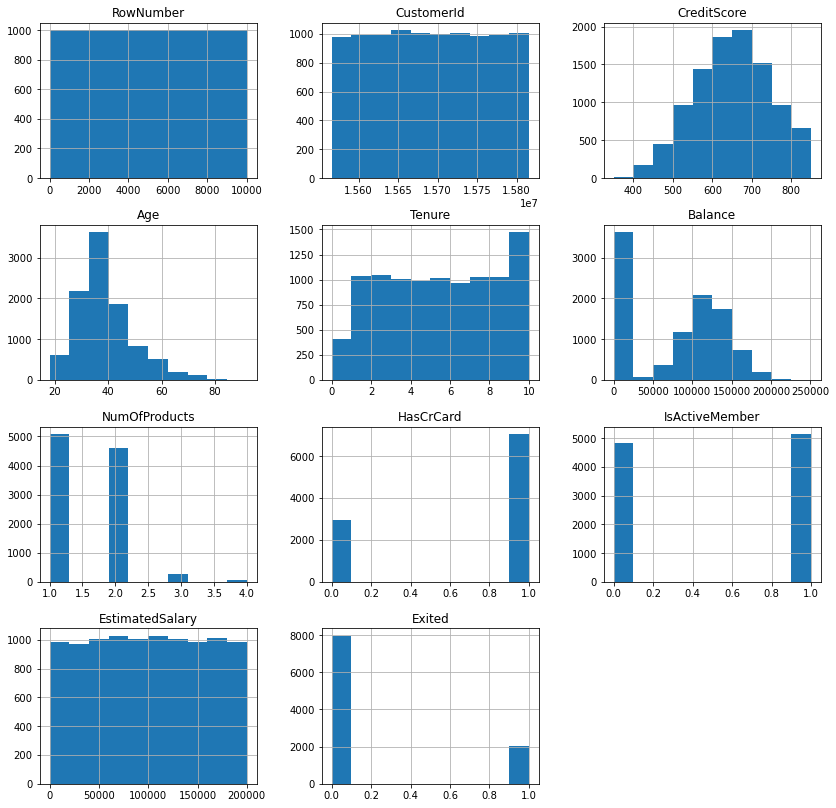

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [140]:
# creating histograms
df.hist(figsize=(14, 14))
plt.show()

<a id="datadesc"> </a>

**Data Description:**  *[Click to return to TOC](#summary_home)*


* `RowNumber` * `CustomerId` - There are 10000 samples of customers that has been provided in the dataset, featuring 14 informations of each customer
* `Surname` - The Last Name of the customers. It looks like there are 32 Customers with same last name of "Smith" and around 2932 unique last names out of 10000 records
* `CreditScore` - The credit scores ranges from 350 - 850 with 650 being the average & median. More than 50% of the customers have score more than 650
* `Geography` - There are 3 locations being considered with France having more number of Customers
* `Gender` - Male customers seem to be more in the dataset with almost 5457 records
* `Age` - The age of the customers are ranging from 18 - 92 with average age being 39. Almost 75% of the customers are less than the age of 44
* `Tenure` - The number of years of association with the bank ranges from 0 to 10 years with almost 50% of them associated for 5+ years
* `Balance` - Customers seems to have an account balance ranging from 0 to 250K with 50% of the customers having more than 97K of balance
* `NumOfProducts` - There are 4 products offered by the bank and almost 50% of the customers have only one product
* `HasCrCard` - More than 25% of the customers have a credit card 
* `IsActiveMember` - Almost 50% of the customers are actively using the bank account
* `EstimatedSalary` - 50% of the customers have more than 100K salary and the max salary is around 200K
* **`Exited`** - This will be the Target variable for analysing the model. Almost 75% of the customers are continuing with the bank and 25% have left


---

<a id="preprocess"> </a>

## Data Preprocessing & Sanity Checks
*[Click to return to TOC](#summary_home)*

---

In [141]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations:**

- We can drop the columns - `RowNumber`, `CustomerId` & `Surname` as it is unique for each customer and will not add value to the model
- Most of the variables with single digit unique values can be consided for categorical types while the remaining can be validated for numerical values. 

#### Dropping the Customer ID Column

In [142]:
# Dropping the Cusitmer ID/Information columns since its not required
df.drop(["RowNumber"], axis=1, inplace=True)
df.drop(["CustomerId"], axis=1, inplace=True)
df.drop(["Surname"], axis=1, inplace=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Checking for Duplicates 

In [143]:
# Checking for duplicated rows in the dataset
duplicateSum = df.duplicated().sum()
print("**Inferences:**")
if duplicateSum > 0:
    print(f"- There are {str(duplicateSum)} duplicated row(s) in the dataset")
    # Removing the duplicated rows in the dataset
    df.drop_duplicates(inplace=True)
    print(
        f"- There are {str(df.duplicated().sum())} duplicated row(s) in the dataset post cleaning"
    )
    df.duplicated().sum()
    # resetting the index of data frame since some rows will be removed
    df.reset_index(drop=True, inplace=True)
else:
    print("- There are no duplicated row(s) in the dataset")

**Inferences:**
- There are no duplicated row(s) in the dataset


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Checking for Columns with missing values

In [144]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observations:**

- There are no missing values which needs to be treated, but we need to check the values for possible incorrect data

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [146]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,NaN,NaN,NaN,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Validating the values of the columns to observe the pattern and data correctness

In [147]:
# printing the number of occurrences of each unique value in each categorical column
num_to_display = 10
for column in df.describe(include="all").columns:
    val_counts = df[column].value_counts(dropna=False)  # Kept dropNA to False to see the NA value count as well
    print("Unique values in", column, "are :")
    print(val_counts.iloc[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")

    print("-" * 50)
    print(" ")


Unique values in CreditScore are :
850    233
678     63
655     54
705     53
667     53
684     52
670     50
651     50
683     48
652     48
Name: CreditScore, dtype: int64
Only displaying first 10 of 460 values.
--------------------------------------------------
 
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
--------------------------------------------------
 
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
--------------------------------------------------
 
Unique values in Age are :
37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
Name: Age, dtype: int64
Only displaying first 10 of 70 values.
--------------------------------------------------
 
Unique values in Tenure are :
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
Name: Tenure, dtype: int64
Only displaying 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a id='valueobserve'></a>

**Observations:**

*[Click to return to TOC](#summary_home)*

* `CreditScore` - Around 233 customers have a score of 850 and the credit score is uniformly distributed
* `Geography` - There are 3 locations being considered France, Germany & Spain, with France having more number of Customers
* `Gender` - Male customers seem to be more in the dataset with almost 5457 records
* `Age` - Customers within the range of 30-40 seems to be the top set of users
* `Tenure` - Customers with 2-1 years seems to be the max number of of association with the bank, followd by 7-8 years
* `Balance` - The data contains a lot of zero balance customers which needs to be treated
* `NumOfProducts` - There are 4 products offered by the bank and customers have taken at least 1 product the max. Followed by 2 products and then 3, 4.
* `HasCrCard` - More than 25% of the customers have a credit card 
* `IsActiveMember` - Almost 50% of the customers are actively using the bank account
* **`Exited`** - This will be the Target variable for analysing the model. Almost 75% of the customers have not exited yet and continuing with the bank


**Inferences:**

- Based on the above observations & values, we will update the features with categorical type values to Category type

In [148]:
df["Geography"] = df["Geography"].astype("category")
df["Gender"] = df["Gender"].astype("category")
df["Tenure"] = df["Tenure"].astype("category")
df["NumOfProducts"] = df["NumOfProducts"].astype("category")
df["HasCrCard"] = df["HasCrCard"].astype("category")
df["IsActiveMember"] = df["IsActiveMember"].astype("category")
df["Exited"] = df["Exited"].astype("category")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [149]:
# Defining bins for splitting the age to groups and creating a new column to review the relationship
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [
    "Less_than_20",
    "Less_than_30",
    "Less_than_40",
    "Less_than_50",
    "Less_than_60",
    "Less_than_70",
    "Less_than_80",
    "Less_than_90",
    "Less_than_100",
]
df["Age_Grp"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)
df["Age_Grp"] = df["Age_Grp"].astype("category")

df["Age_Grp"].value_counts(dropna=False)

Less_than_40     4346
Less_than_50     2618
Less_than_30     1592
Less_than_60      869
Less_than_70      375
Less_than_80      136
Less_than_20       49
Less_than_90       13
Less_than_100       2
Name: Age_Grp, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [150]:
# Defining bins for credit score and creating a new column to review the relationship
bins = [300, 400, 500, 600, 700, 800, 900]
labels = [
    "CS_300_400",
    "CS_400_500",
    "CS_500_600",
    "CS_600_700",
    "CS_700_800",
    "CS_800_900",
]
df["CreditScore_Grp"] = pd.cut(df["CreditScore"], bins=bins, labels=labels, right=False)
df["CreditScore_Grp"] = df["CreditScore_Grp"].astype("category")

df["CreditScore_Grp"].value_counts(dropna=False)

CS_600_700    3818
CS_700_800    2493
CS_500_600    2402
CS_800_900     655
CS_400_500     613
CS_300_400      19
Name: CreditScore_Grp, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [151]:
# Defining bins for Salary and creating a new column to review the relationship
bins = [0, 50000, 100000, 150000, 200000]
labels = [
    "Lessthan_50K",
    "Between_50K-100K",
    "Between_100K-150K",
    "Between_150K-200K",
]
df["EstimatedSalary_Grp"] = pd.cut(
    df["EstimatedSalary"], bins=bins, labels=labels, right=False
)
df["EstimatedSalary_Grp"] = df["EstimatedSalary_Grp"].astype("category")

df["EstimatedSalary_Grp"].value_counts(dropna=False)

Between_100K-150K    2555
Between_50K-100K     2537
Between_150K-200K    2455
Lessthan_50K         2453
Name: EstimatedSalary_Grp, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [152]:
# Observing the data dictionery after the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CreditScore          10000 non-null  int64   
 1   Geography            10000 non-null  category
 2   Gender               10000 non-null  category
 3   Age                  10000 non-null  int64   
 4   Tenure               10000 non-null  category
 5   Balance              10000 non-null  float64 
 6   NumOfProducts        10000 non-null  category
 7   HasCrCard            10000 non-null  category
 8   IsActiveMember       10000 non-null  category
 9   EstimatedSalary      10000 non-null  float64 
 10  Exited               10000 non-null  category
 11  Age_Grp              10000 non-null  category
 12  CreditScore_Grp      10000 non-null  category
 13  EstimatedSalary_Grp  10000 non-null  category
dtypes: category(10), float64(2), int64(2)
memory usage: 412.2 KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [153]:
# Command to understand the total number of data collected
print(
    f"- There are {df.shape[0]} row samples and {df.shape[1]} attributes of the customer information collected in this dataset."
)

- There are 10000 row samples and 14 attributes of the customer information collected in this dataset.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [154]:
# Identofying the category columns
category_columnNames = df.describe(include=["category"]).columns
category_columnNames

Index(['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'Age_Grp', 'CreditScore_Grp',
       'EstimatedSalary_Grp'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [155]:
# Identifying the numerical columns
number_columnNames = (
    df.describe(include=["int64"]).columns.tolist()
    + df.describe(include=["float64"]).columns.tolist()
)
number_columnNames

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [156]:
df.describe(include="category").T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
Tenure,10000,11,2,1048
NumOfProducts,10000,4,1,5084
HasCrCard,10000,2,1,7055
IsActiveMember,10000,2,1,5151
Exited,10000,2,0,7963
Age_Grp,10000,9,Less_than_40,4346
CreditScore_Grp,10000,6,CS_600_700,3818
EstimatedSalary_Grp,10000,4,Between_100K-150K,2555


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [157]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

<a id='dataanalysis1'></a>

### Summary of Data Analysis

*[Click to return to TOC](#summary_home)*

**Data Structure:**

* There were 10000 row samples and 14 attributes of the customer information collected in this dataset.
* Dependent variable is the Exited feature which was of integer data type
* There were float64(2), int64(9), object(3) features in the dataset

**Data Cleaning:**

* `RowNumber`, `CustomerId` & `Surname` attributes are not required and the column was dropped
* Some of the columns with Categorical values where converted to Category type
* There were no duplicates
* There were no missing values in the dataset
* Using Bins, couple of new columns were added to review the relationship
* Post cleaning and data type conversion, 
    - There are category(10), float64(2), int64(2)
	- There are now 10000 row samples and 14 attributes of the customer information  
    
**Data Insight:**
* France is the top location in terms of Customers Geography
* Customers are predominently Male users
* Most of the customers have been associated bank for 2 years
* Customers have purchased at least 1 product from the bank
* Most of the Customers have a credit card and have not exited the bank
* Customers with in the age group of 30-40 are maximum, though the age ranges from 18- 92
* Most of the Customers have a credit score in the range of 600-700. 50% of the customers are more than 652 score
* Most of the Customers have a Salary range of 100k - 500K
* 50% of the Customers are above the 100K salaray range with max upto 200K 
  
**For more data information details, refer comments in *[Data descriptions](#datadesc)* &  *[Feature Value observations](#valueobserve)***
 

---

### Common Functions


In [158]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, hueCol=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 7))

    plt.xticks(rotation=90, fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        hue=hueCol,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )
        # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [159]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True,).sort_values(
        by=sorter, ascending=False
    )
    print("-" * 30, " Volume ", "-" * 30)
    print(tab1)

    tab1 = pd.crosstab(
        data[predictor], data[target], margins=True, normalize="index"
    ).sort_values(by=sorter, ascending=False)
    print("-" * 30, " Percentage % ", "-" * 30)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [160]:
# Creating a common function to draw a Boxplot & a Histogram for each of the analysis
def histogram_boxplot(data, feature, figsize=(15, 7), kde=True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column

    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        )
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [161]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col, lower=0.25, upper=0.75, mul=1.5):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(lower)  # 25th quantile
    Q3 = df[col].quantile(upper)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - (mul * IQR)
    Upper_Whisker = Q3 + (mul * IQR)

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list, lower=0.25, upper=0.75, mul=1.5):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c, lower, upper, mul)

    return df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

<a id="dataposttreatment"> </a>
 
### Data Description Post Treament
*[Click to return to TOC](#summary_home)*


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CreditScore          10000 non-null  int64   
 1   Geography            10000 non-null  category
 2   Gender               10000 non-null  category
 3   Age                  10000 non-null  int64   
 4   Tenure               10000 non-null  category
 5   Balance              10000 non-null  float64 
 6   NumOfProducts        10000 non-null  category
 7   HasCrCard            10000 non-null  category
 8   IsActiveMember       10000 non-null  category
 9   EstimatedSalary      10000 non-null  float64 
 10  Exited               10000 non-null  category
 11  Age_Grp              10000 non-null  category
 12  CreditScore_Grp      10000 non-null  category
 13  EstimatedSalary_Grp  10000 non-null  category
dtypes: category(10), float64(2), int64(2)
memory usage: 412.2 KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [163]:
# Data Secription of Categorical variables
df.describe(include="category").T


,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
Tenure,10000,11,2,1048
NumOfProducts,10000,4,1,5084
HasCrCard,10000,2,1,7055
IsActiveMember,10000,2,1,5151
Exited,10000,2,0,7963
Age_Grp,10000,9,Less_than_40,4346
CreditScore_Grp,10000,6,CS_600_700,3818
EstimatedSalary_Grp,10000,4,Between_100K-150K,2555


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [164]:
# Data Secription of Categorical variables
df.describe().T


,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

<a id="edaanalysis"> </a>

## EDA Analysis - Analyzing respective attributes to understand the data pattern
*[Click to return to TOC](#summary_home)*

---

In [165]:
# Summary of data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,11.0,2.0,1048.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,4.0,1.0,5084.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HasCrCard,10000.0,2.0,1.0,7055.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsActiveMember,10000.0,2.0,1.0,5151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EstimatedSalary,10000.0,NaN,NaN,NaN,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Analyzing the count and percentage of Categorical attributes using a bar chart

Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


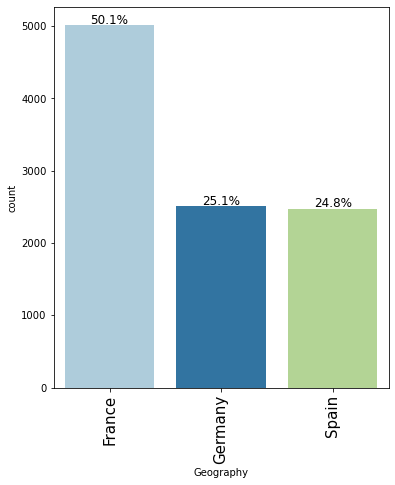

--------------------------------------------------
 
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64


<Figure size 432x288 with 0 Axes>

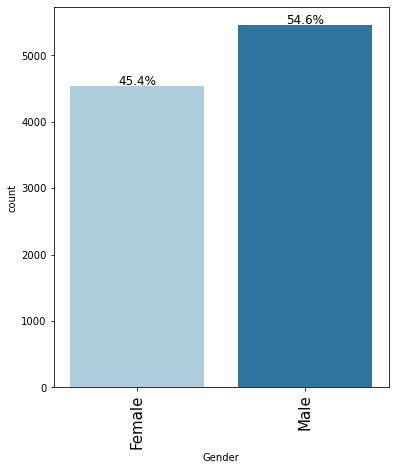

--------------------------------------------------
 
Unique values in Tenure are :
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


<Figure size 432x288 with 0 Axes>

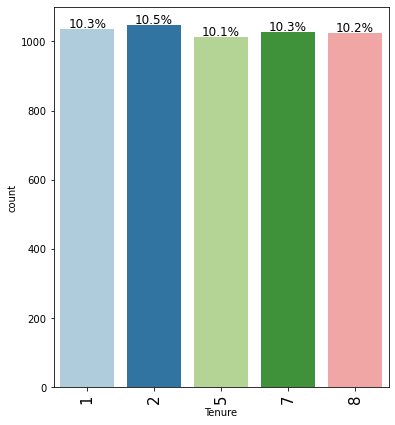

--------------------------------------------------
 
Unique values in NumOfProducts are :
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


<Figure size 432x288 with 0 Axes>

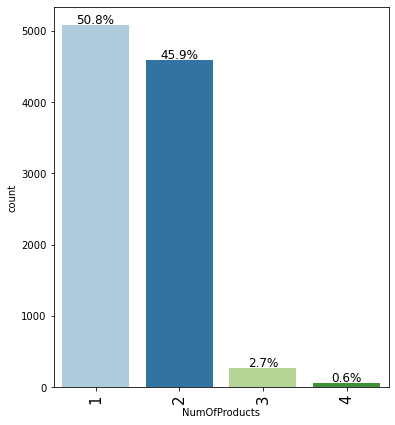

--------------------------------------------------
 
Unique values in HasCrCard are :
1    7055
0    2945
Name: HasCrCard, dtype: int64


<Figure size 432x288 with 0 Axes>

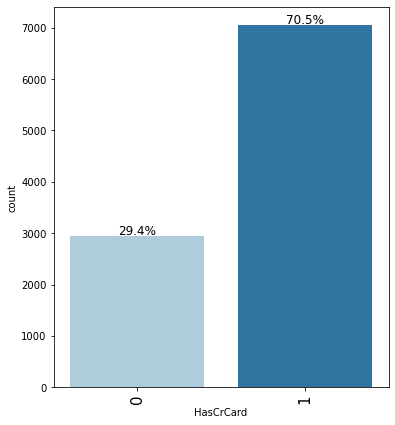

--------------------------------------------------
 
Unique values in IsActiveMember are :
1    5151
0    4849
Name: IsActiveMember, dtype: int64


<Figure size 432x288 with 0 Axes>

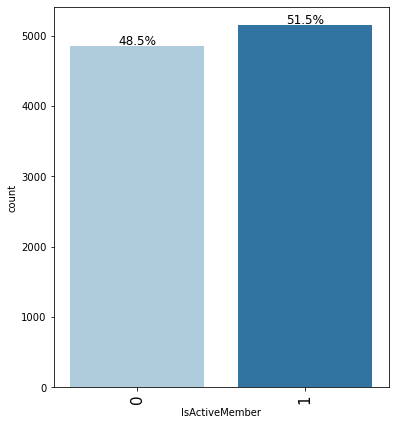

--------------------------------------------------
 
Unique values in Exited are :
0    7963
1    2037
Name: Exited, dtype: int64


<Figure size 432x288 with 0 Axes>

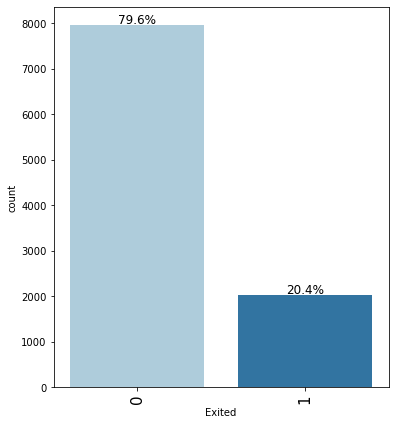

--------------------------------------------------
 
Unique values in Age_Grp are :
Less_than_40     4346
Less_than_50     2618
Less_than_30     1592
Less_than_60      869
Less_than_70      375
Less_than_80      136
Less_than_20       49
Less_than_90       13
Less_than_100       2
Name: Age_Grp, dtype: int64


<Figure size 432x288 with 0 Axes>

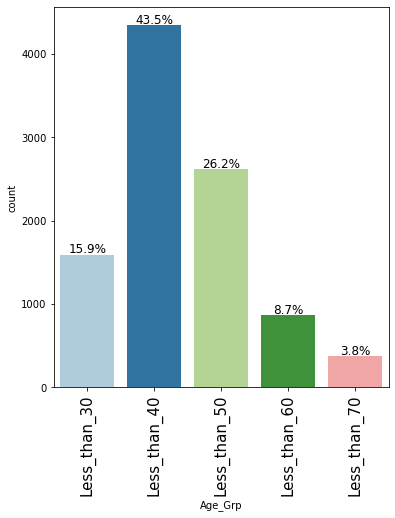

--------------------------------------------------
 
Unique values in CreditScore_Grp are :
CS_600_700    3818
CS_700_800    2493
CS_500_600    2402
CS_800_900     655
CS_400_500     613
CS_300_400      19
Name: CreditScore_Grp, dtype: int64


<Figure size 432x288 with 0 Axes>

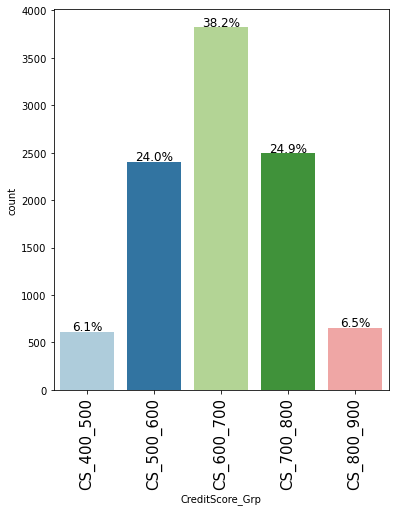

--------------------------------------------------
 
Unique values in EstimatedSalary_Grp are :
Between_100K-150K    2555
Between_50K-100K     2537
Between_150K-200K    2455
Lessthan_50K         2453
Name: EstimatedSalary_Grp, dtype: int64


<Figure size 432x288 with 0 Axes>

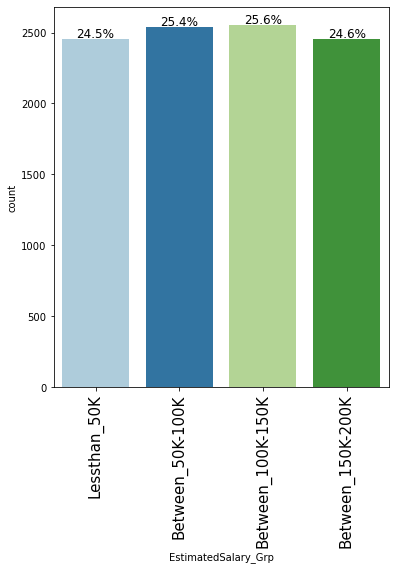

--------------------------------------------------
 


<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [166]:
# printing the number of occurrences of each unique value in each categorical column

num_to_display = 15
for column in category_columnNames:
    val_counts = df[column].value_counts(
        dropna=False
    )  # Kept dropNA to False to see the NA value count as well
    #val_countsP = df[column].value_counts(dropna=False, normalize=True)
    print("Unique values in", column, "are :")
    print(val_counts.iloc[:num_to_display])
    #print(val_countsP.iloc[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")

    labeled_barplot(df, column, perc=True, n=5)
    plt.tight_layout()

    print("-" * 50)
    print(" ")


<a id='inCategory1'> </a>

### Insights from Categorical Data
*[Click to return to TOC](#summary_home)*


**Observations:**

* `Age` - 43.5% of the customers fall with in the range of 30-40 age limits, followed by 40-50 years
 
* `Credit Score` - 38% of the customers are within the range of 600-700 scores, followed by 700-800 and 500-600 ranges respectively
  
* `Salary` - Almost 25% of customers are uniformally distributed between 50K, 100K, 150K and 200K
 
* `Geography` - 50% of the customers are from France, 25% from Germany and 25% from Spain
 
* `Gender` - 55% of the customers are Male customers
 
* `Tenure` - 50% of the customers seems to be uniformly distributed of around 10% across 1, 2, 5, 7, 8 years
 
* `NumOfProducts` - There are 4 products offered by the bank. 51% of customers have taken 1 product and 46% of them have taken 2 products
 
* `HasCrCard` - 71% of the customers have a credit card 
 
* `IsActiveMember` - Almost 52% of the customers are actively using the bank account
 
* **`Exited`** - Almost 80% of the customers are still associated with the bank without exiting
  

---

#### Analyzing the Numerical attributes using Histogram and Box Plots

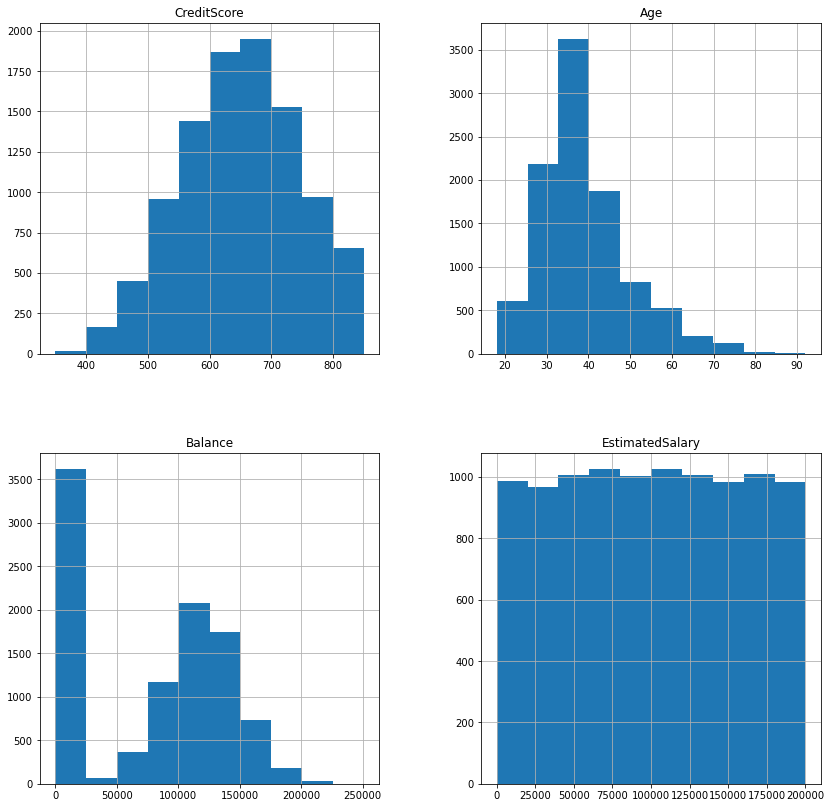

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [167]:
# creating histograms
df.hist(figsize=(14, 14))
plt.show()

In [168]:
# Summary of numeric data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a id='inNumber1'> </a>

### <a id='inNumber2'>Insights from Numerical Data</a>
*[Click to return to TOC](#summary_home)*


**Observations:**

* Credit score seems to be uniformally distributed, with most of the customers in the range of 500-800
* Age of the customers are ranging between 20-90, with more customers in the range of 25-50
* There seems to be a peak at zero balance for some of the customers which needs to be analyzed. Otherwise, the customers balance are distributed normally between 50 to 200K


---

<a id='UnivariateAnalysis1'> </a>

### Univariate Analysis
*[Click to return to TOC](#summary_home)*

--- 


#### Analyzing the Balance of the Customers

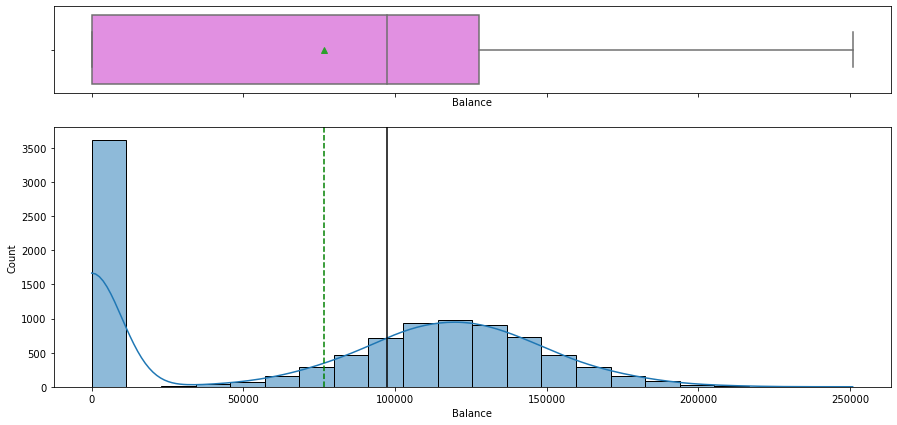

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [169]:
histogram_boxplot(df, "Balance")

* The distribution has a positive skew pattern with no outliers
* The Median is more than the Mean and the data is highly skewed
* There is a high number of zero balance customers which needs to be anaylyzed

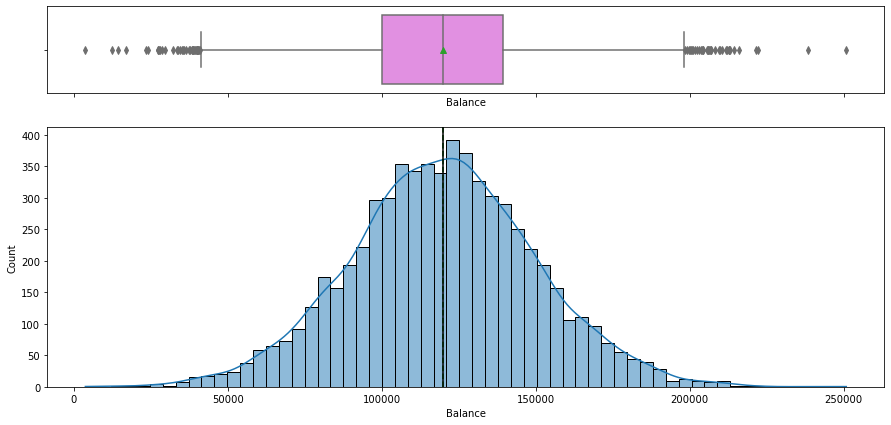

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [170]:
# Replacing the Zero values with NAN
df["Balance"] = df["Balance"].replace(0, np.nan)
histogram_boxplot(df, "Balance")

In [171]:
df.groupby(["Age_Grp", "EstimatedSalary_Grp"])["Balance"].mean()

Age_Grp        EstimatedSalary_Grp
Less_than_20   Lessthan_50K           113819.450909
               Between_50K-100K        82767.420000
               Between_100K-150K      133052.409091
               Between_150K-200K      120991.620000
Less_than_30   Lessthan_50K           120279.868577
               Between_50K-100K       120107.320491
               Between_100K-150K      124012.452706
               Between_150K-200K      120075.041811
Less_than_40   Lessthan_50K           119858.643436
               Between_50K-100K       121777.056971
               Between_100K-150K      117851.005694
               Between_150K-200K      119362.658278
Less_than_50   Lessthan_50K           121623.465299
               Between_50K-100K       117248.360970
               Between_100K-150K      119485.156864
               Between_150K-200K      119685.754170
Less_than_60   Lessthan_50K           120918.262353
               Between_50K-100K       117758.934691
               Between_100K-1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [172]:
# Replacing NAN based on the Median values of the Grouping of Age & Estimated Salary
df["Balance"] = df["Balance"].fillna(
    df.groupby(["Age", "EstimatedSalary"])["Balance"].transform("median")
)

# Replacing NAN based on the Median values of the Grouping of Age_Group & EstimatedSalary_Group
df["Balance"] = df["Balance"].fillna(
    df.groupby(["Age_Grp", "EstimatedSalary_Grp"])["Balance"].transform("median")
)

# Replacing remaining NAN with 0's
df["Balance"] = df["Balance"].fillna(0)

df[df["Balance"].isna()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Grp,CreditScore_Grp,EstimatedSalary_Grp


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

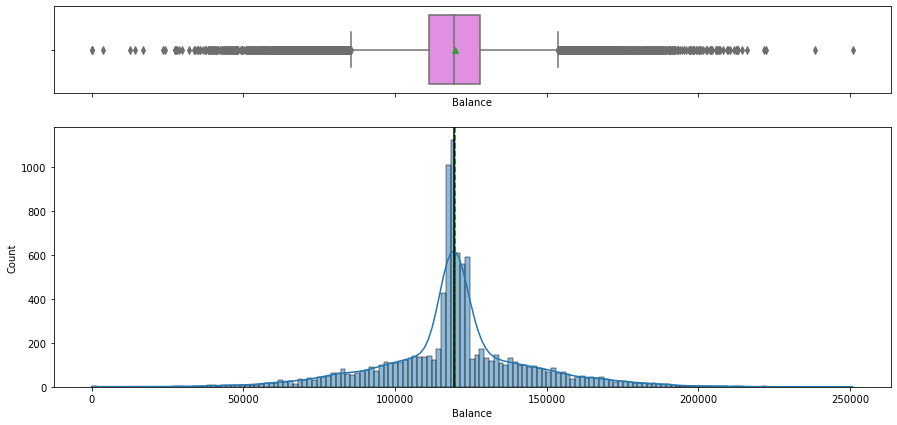

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [173]:
histogram_boxplot(df, "Balance")

#### Aalyzing the Credit Score of the Customers

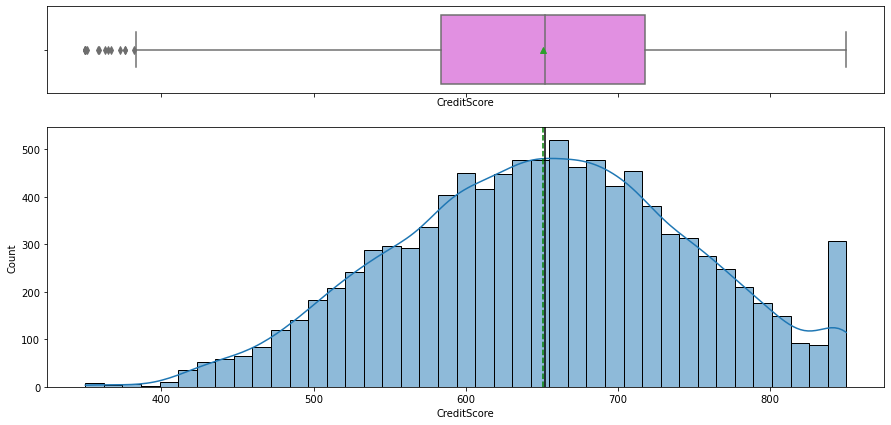

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [174]:
histogram_boxplot(df, "CreditScore")

**Observations:**

* Credit score has a normal distribution with Customers with score of 400 - 850 
* The Mean & Median are almost the same
* There are very few outliers identified in this feature data. No outlier treatment is required


#### Analyzing the Age of the bank customers

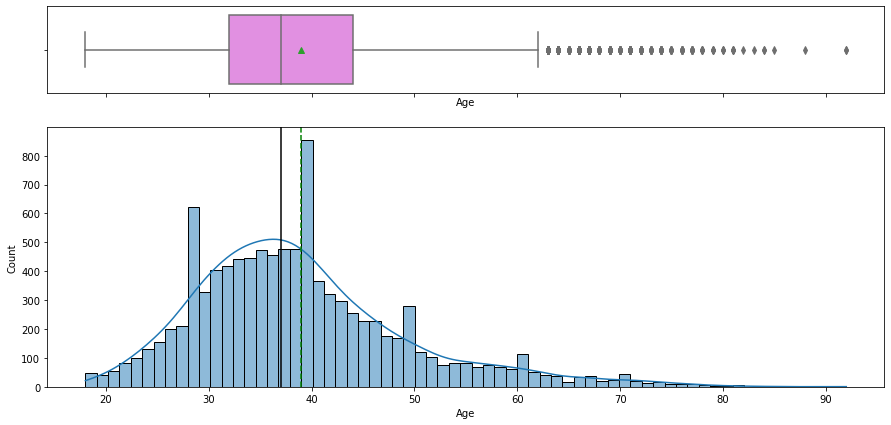

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [175]:
histogram_boxplot(df, "Age")

**Observations:**

* Mean & Median are almost close to each other but positvely skewed
* Customers age range from around 10 years to close to 60 years
* The distribution looks normal with few outliers on both ends. 


#### Analyzing the EstimatedSalary

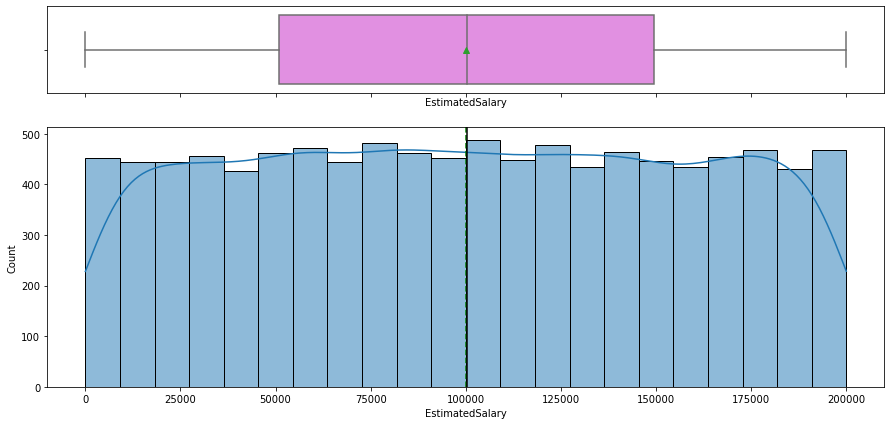

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [176]:
histogram_boxplot(df, "EstimatedSalary")

**Observations:**

* Distribution is uniform without outliers
* The Median is closer to the Mean


---

<a id="bivariate"> </a>
 
### Bivariate Analysis
*[Click to return to TOC](#summary_home)*

---
 


### Visualise variables association with Exit parameter & its correlation


#### Analyzing the Categorial attributes with Exit Flag

------------------------------  Volume  ------------------------------
Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------  Percentage %  ------------------------------
Exited            0         1
Geography                    
Germany    0.675568  0.324432
All        0.796300  0.203700
Spain      0.833266  0.166734
France     0.838452  0.161548
------------------------------------------------------------------------------------------------------------------------


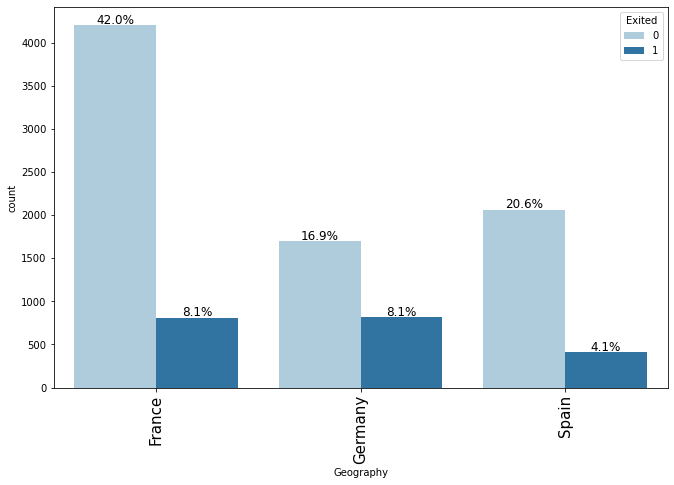

------------------------------  Volume  ------------------------------
Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------  Percentage %  ------------------------------
Exited         0         1
Gender                    
Female  0.749285  0.250715
All     0.796300  0.203700
Male    0.835441  0.164559
------------------------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

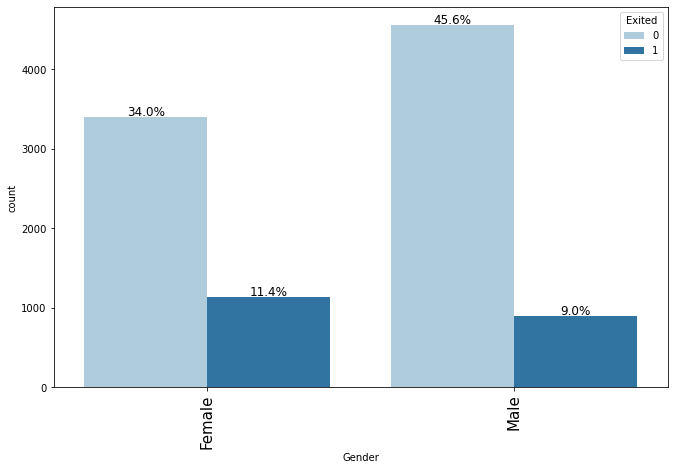

------------------------------  Volume  ------------------------------
Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------  Percentage %  ------------------------------
Exited         0         1
Tenure                    
0       0.769976  0.230024
1       0.775845  0.224155
9       0.783537  0.216463
3       0.788900  0.211100
5       0.793478  0.206522
10      0.793878  0.206122
4       0.794742  0.205258
All     0.796300  0.203700
6       0.797311  0.202689
8       0.807805  0.192195
2       0.808206  0.191794
7       0.827821  0.172179
--------------------------------------------------------------------------------------------------------------

<Figure size 432x288 with 0 Axes>

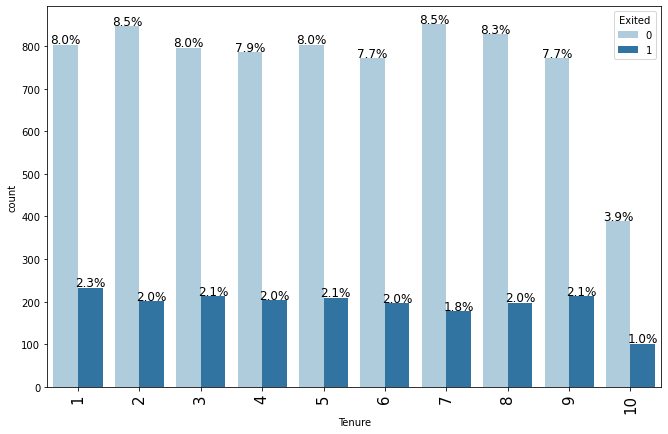

------------------------------  Volume  ------------------------------
Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------  Percentage %  ------------------------------
Exited                0         1
NumOfProducts                    
4              0.000000  1.000000
3              0.172932  0.827068
1              0.722856  0.277144
All            0.796300  0.203700
2              0.924183  0.075817
------------------------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

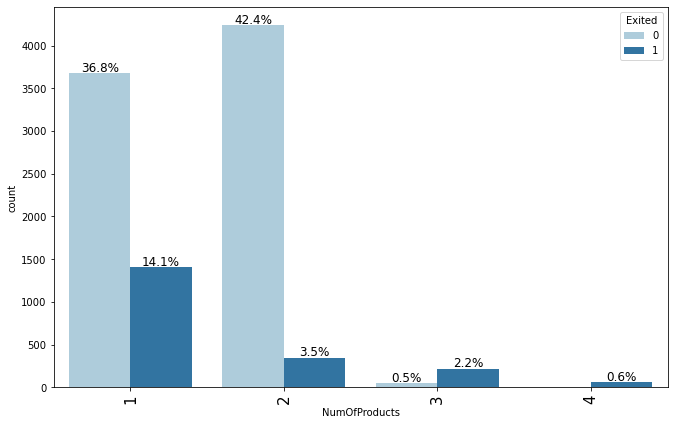

------------------------------  Volume  ------------------------------
Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------  Percentage %  ------------------------------
Exited            0         1
HasCrCard                    
0          0.791851  0.208149
All        0.796300  0.203700
1          0.798157  0.201843
------------------------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

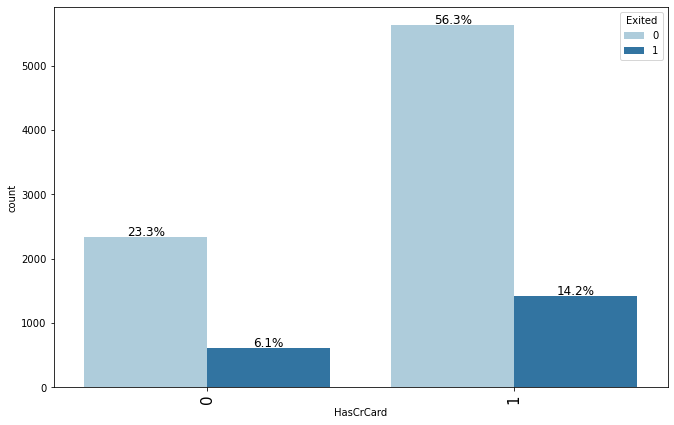

------------------------------  Volume  ------------------------------
Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------  Percentage %  ------------------------------
Exited                 0         1
IsActiveMember                    
0               0.731491  0.268509
All             0.796300  0.203700
1               0.857309  0.142691
------------------------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

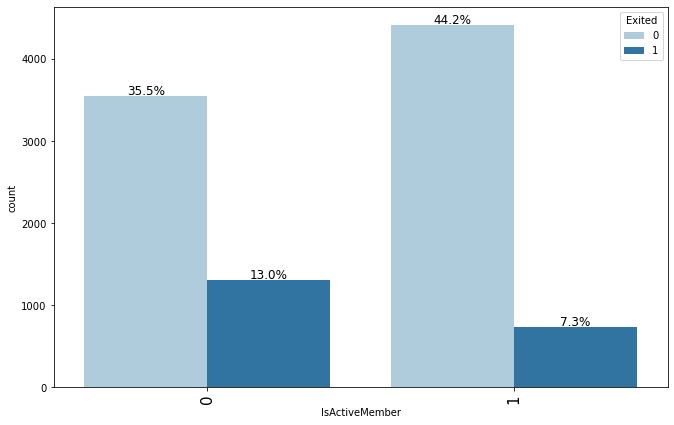

------------------------------  Volume  ------------------------------
Exited     0     1    All
Exited                   
1          0  2037   2037
All     7963  2037  10000
0       7963     0   7963
------------------------------  Percentage %  ------------------------------
Exited       0       1
Exited                
1       0.0000  1.0000
All     0.7963  0.2037
0       1.0000  0.0000
------------------------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

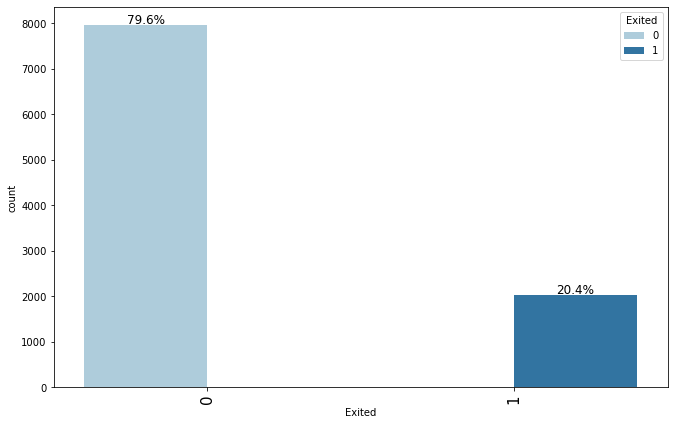

------------------------------  Volume  ------------------------------
Exited            0     1    All
Age_Grp                         
All            7963  2037  10000
Less_than_50   1812   806   2618
Less_than_60    382   487    869
Less_than_40   3873   473   4346
Less_than_70    243   132    375
Less_than_30   1471   121   1592
Less_than_80    122    14    136
Less_than_20     46     3     49
Less_than_90     12     1     13
Less_than_100     2     0      2
------------------------------  Percentage %  ------------------------------
Exited                0         1
Age_Grp                          
Less_than_60   0.439586  0.560414
Less_than_70   0.648000  0.352000
Less_than_50   0.692131  0.307869
All            0.796300  0.203700
Less_than_40   0.891164  0.108836
Less_than_80   0.897059  0.102941
Less_than_90   0.923077  0.076923
Less_than_30   0.923995  0.076005
Less_than_20   0.938776  0.061224
Less_than_100  1.000000  0.000000
------------------------------------------------

<Figure size 432x288 with 0 Axes>

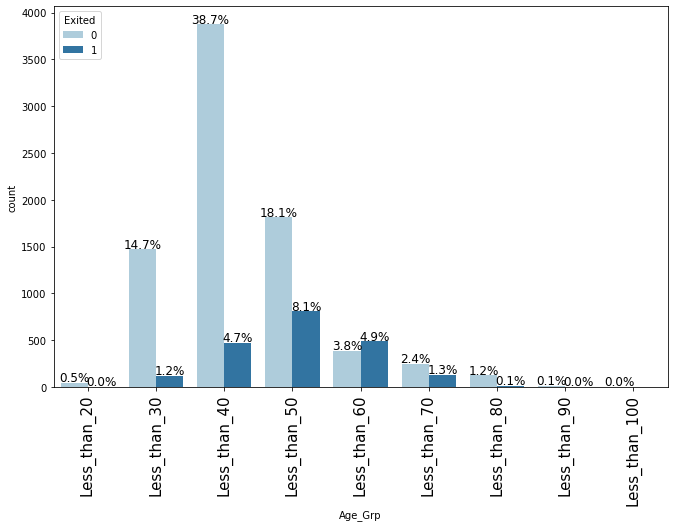

------------------------------  Volume  ------------------------------
Exited              0     1    All
CreditScore_Grp                   
All              7963  2037  10000
CS_600_700       3065   753   3818
CS_500_600       1892   510   2402
CS_700_800       1997   496   2493
CS_400_500        482   131    613
CS_800_900        527   128    655
CS_300_400          0    19     19
------------------------------  Percentage %  ------------------------------
Exited                  0         1
CreditScore_Grp                    
CS_300_400       0.000000  1.000000
CS_400_500       0.786297  0.213703
CS_500_600       0.787677  0.212323
All              0.796300  0.203700
CS_700_800       0.801043  0.198957
CS_600_700       0.802776  0.197224
CS_800_900       0.804580  0.195420
------------------------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

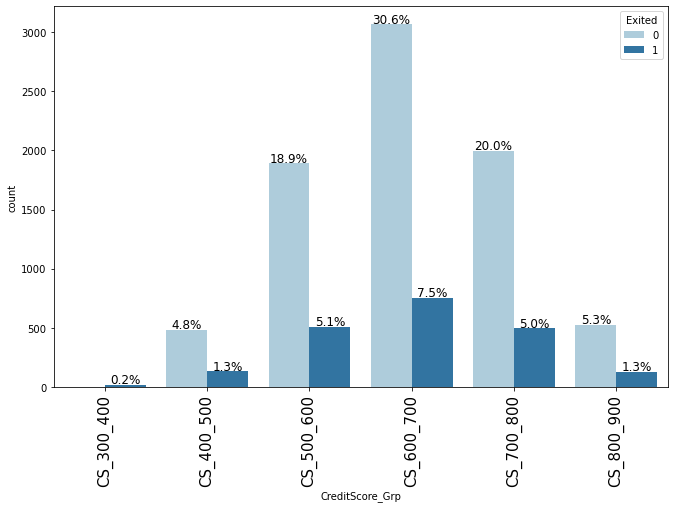

------------------------------  Volume  ------------------------------
Exited                  0     1    All
EstimatedSalary_Grp                   
All                  7963  2037  10000
Between_150K-200K    1928   527   2455
Between_100K-150K    2038   517   2555
Between_50K-100K     2033   504   2537
Lessthan_50K         1964   489   2453
------------------------------  Percentage %  ------------------------------
Exited                      0         1
EstimatedSalary_Grp                    
Between_150K-200K    0.785336  0.214664
All                  0.796300  0.203700
Between_100K-150K    0.797652  0.202348
Lessthan_50K         0.800652  0.199348
Between_50K-100K     0.801340  0.198660
------------------------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

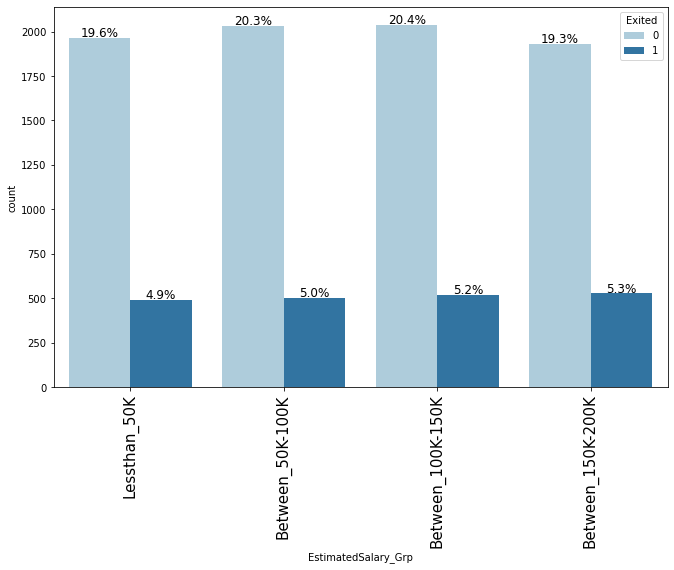

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [177]:
# Creating a function to display the values of the attributes against the chart
for i, cols in zip(range(len(category_columnNames)), category_columnNames):
    count = df[cols].nunique()
    sorter = df["Exited"].value_counts(dropna=False).index[-1]
    tab1 = pd.crosstab(df[cols], df["Exited"], margins=True,).sort_values(
        by=sorter, ascending=False
    )
    print("-" * 30, " Volume ", "-" * 30)
    print(tab1)

    tab1 = pd.crosstab(
        df[cols], df["Exited"], margins=True, normalize="index"
    ).sort_values(by=sorter, ascending=False)
    print("-" * 30, " Percentage % ", "-" * 30)
    print(tab1)
    print("-" * 120)
    
    labeled_barplot(df, cols, perc=True, n=10, hueCol="Exited")
    plt.tight_layout()


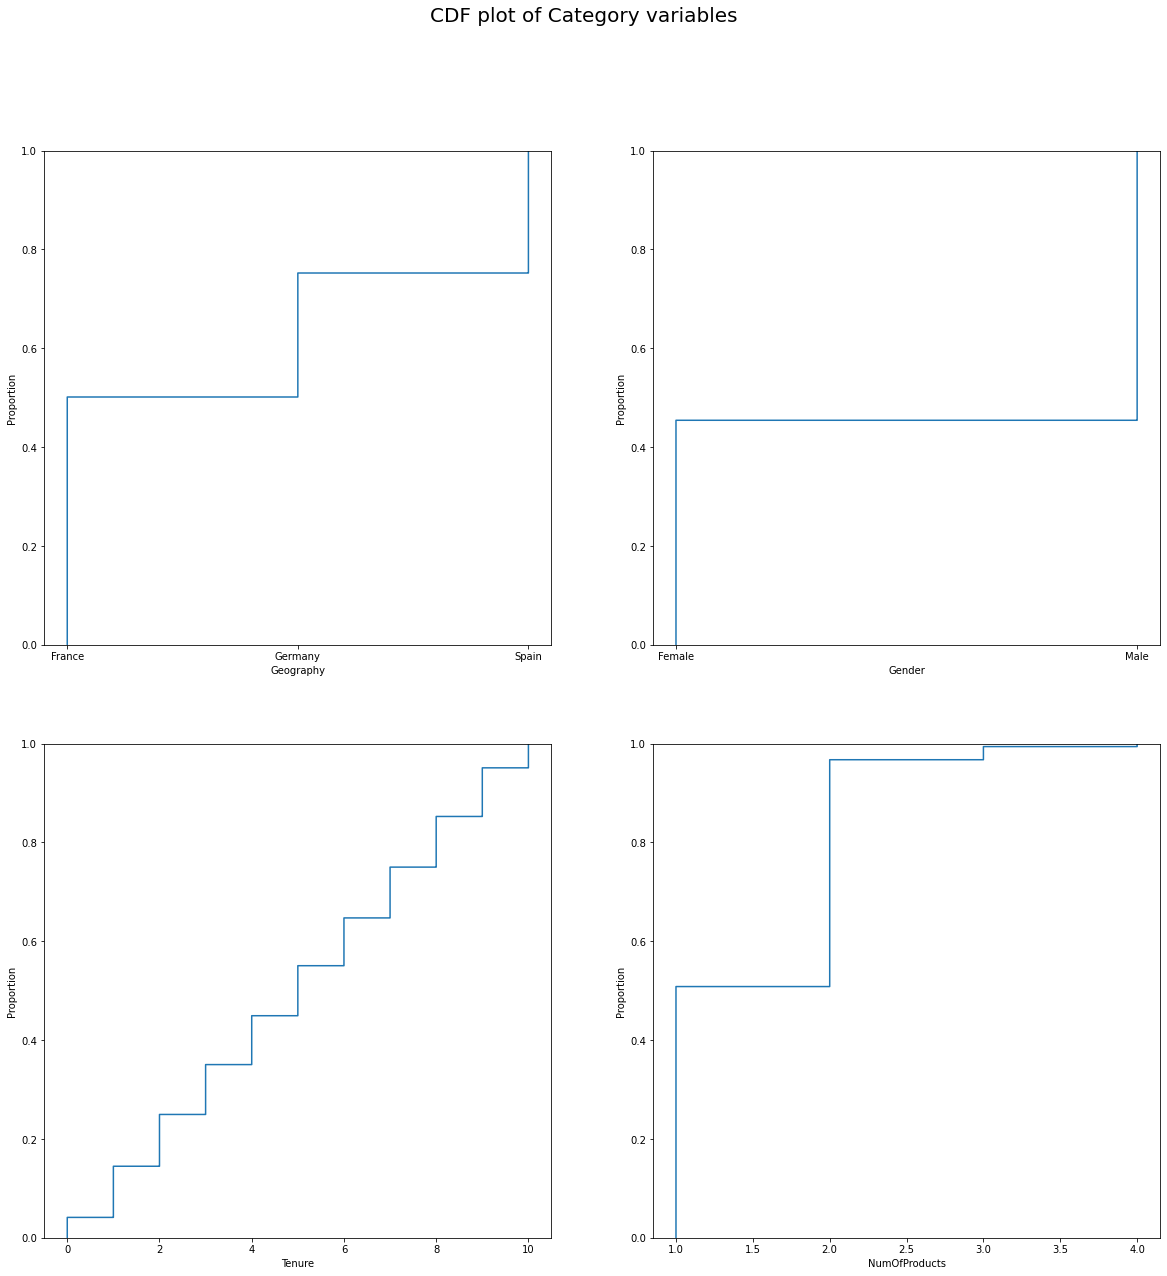

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [178]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle("CDF plot of Category variables", fontsize=20)
counter = 0
for ii in range(2):
    sns.ecdfplot(ax=axes[ii][0], x=df[category_columnNames[counter]])
    counter = counter + 1
    if counter != 2 :
        sns.ecdfplot(ax=axes[ii][1], x=df[category_columnNames[counter]])
        counter = counter + 1
    else:
        pass


<a id='BivariateCat'> </a>

**Observation:**

*[Click to return to TOC](#summary_home)*


**`Exited` vs `Geography`**

* Though France has the most number of Customers, Germany location seems to have had the major exit of customers in this location. Almost 32% of the customers in this location had exited
* France had 16% customers leaving the bank similar to Spain customers as well
* France has the highest retention of their customers

**`Exited` vs `Gender`**

* Female customers seems to have the highest 11.4% of customer leaving the bank though the dataset has more Male customers
* Within retained customers, 46% are Male and 34% are Female

**`Exited` vs `Tenure`**
* Irrespective of the tenure, there is a 1-2% of the customers have left the bank
* Almost 7-8% of the customers are found spread across the tenure age from 1-9
* For more than 10 years 4% of the customers have continued with the bank and 1% has left the bank

**`Exited` vs `NumOfProducts`**
* 42.4% of the customers have 2 products and only 3.5% of the customers had left the bank in this group
* 36.8% of the customers had only 1 product but 14.1 of them had left the bank in this group
* There is a very small % of users using more than 3-4 products and in most cases, they have left the bank

**`Exited` vs `HasCrCard`**
* 56.3% of the customers have credit card, but we also 14.3 customers using the credit card have left the bank
* 23.3% of Customers, though they dont have credit card, have stayed with the banl

**`Exited` vs `IsActiveMember`**
* 44.2% of the customers were active and 35.5% of the customers were not active. In either cases, they continued to stay with the bank
* 13% of the customers under inactive mode, have left the bank.

**`Exited` vs `Age Group`**
* 8.1% of the customers in the age group of 40-50 had left the bank.
* Most of the customers who have not left the bank are either they are less than age 20 or more than 70 age. 
* Within the agen groups, we see customers with credit score of 300-500 are leaving the bank

**`Exited` vs `EstimatedSalary_Grp`**
* There a standard 5% of the customers leaving the bank irresptive of salary range
* The salary range is uniform with 25% customers in each salary group


#### Analyzing the Numerical attributes

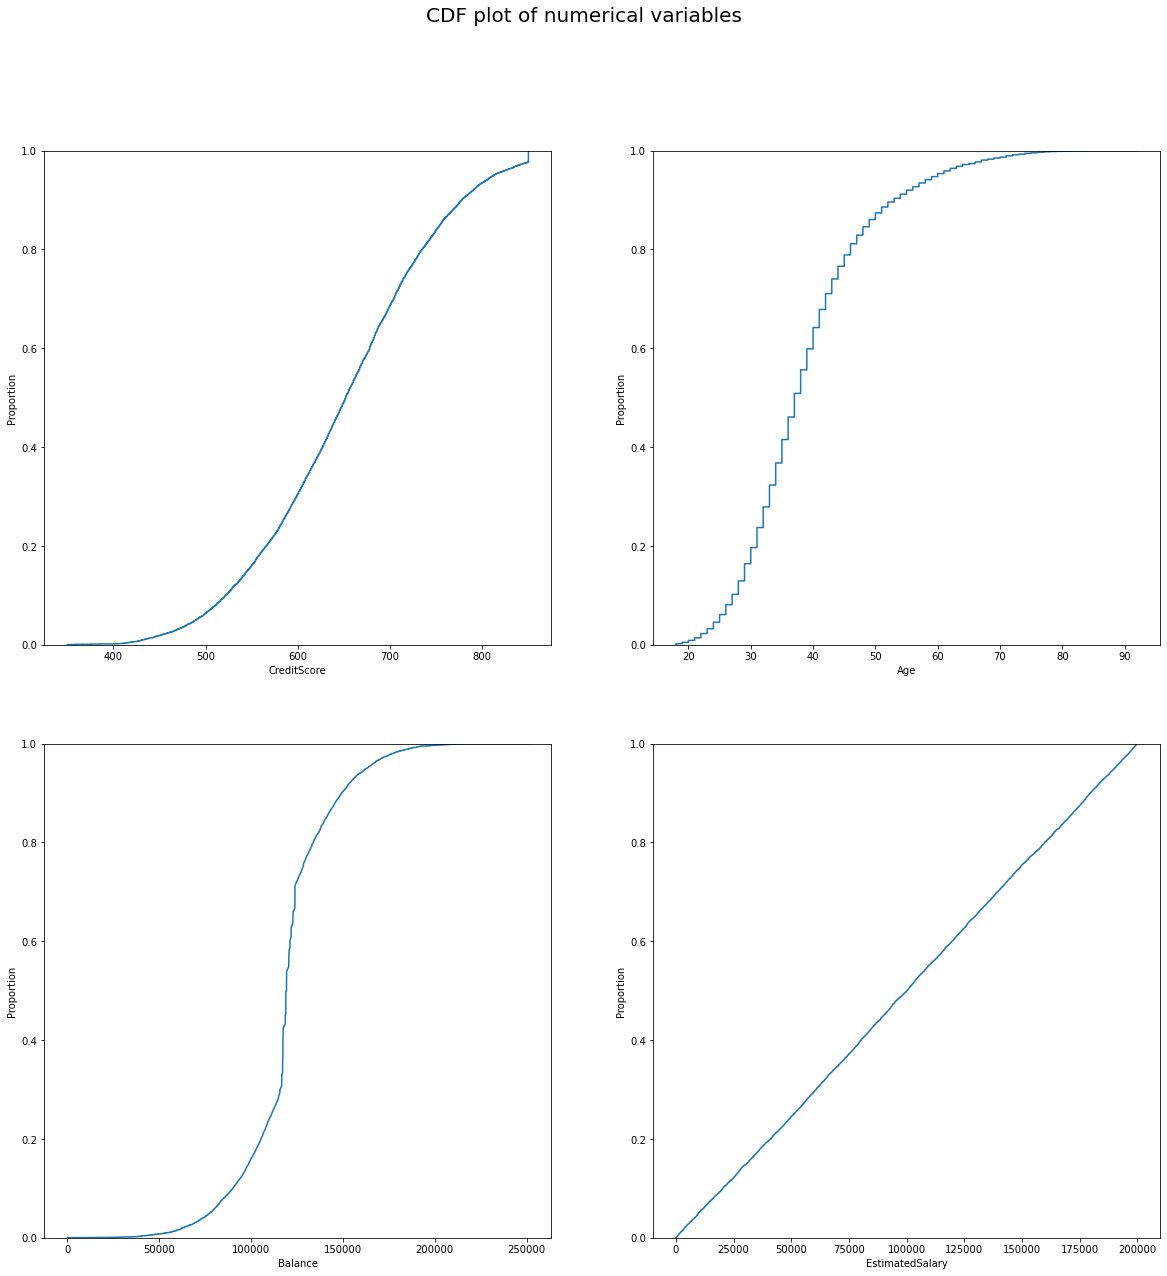

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [179]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(2):
    sns.ecdfplot(ax=axes[ii][0], x=df[number_columnNames[counter]])
    counter = counter + 1
    if counter != 2 :
        sns.ecdfplot(ax=axes[ii][1], x=df[number_columnNames[counter]])
        counter = counter + 1
    else:
        pass


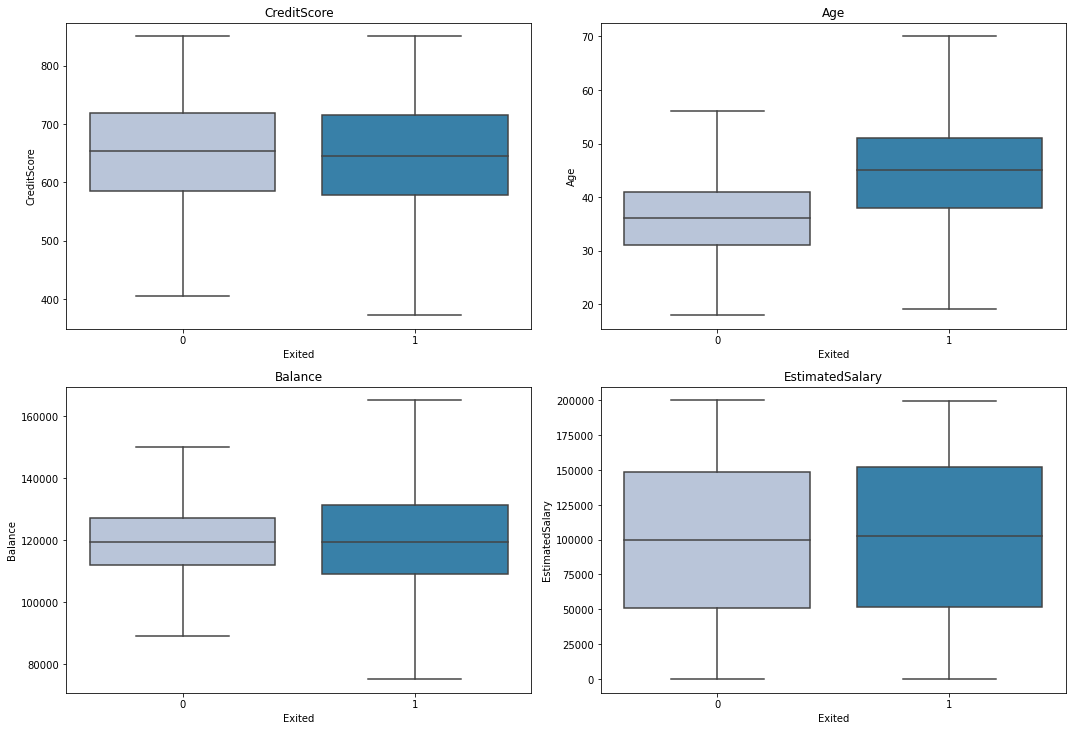

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [180]:
plt.figure(figsize=(15, 25))

for i, variable in enumerate(number_columnNames):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(df["Exited"], df[variable], palette="PuBu", showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

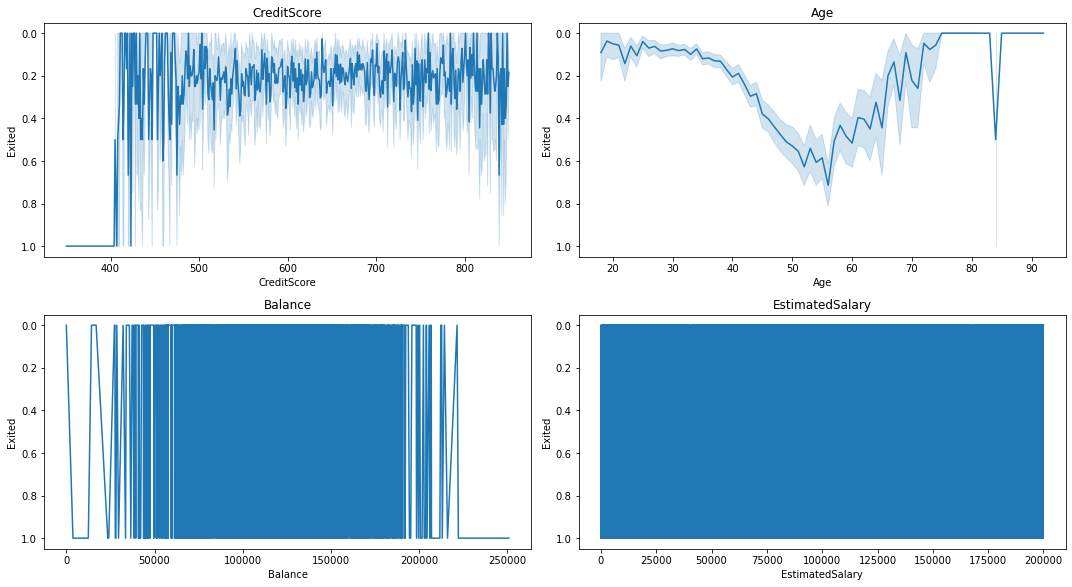

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [181]:
plt.figure(figsize=(15, 20))

for i, variable in enumerate(number_columnNames):
    plt.subplot(5, 2, i + 1)
    sns.lineplot(x=variable, y="Exited", data=df)
    plt.tight_layout()
    plt.title(variable)
plt.show()


<a id='BivariateNum'> </a>

**Observation:**

*[Click to return to TOC](#summary_home)*


**`Exited` vs `Credit Score`**
* Irrespective of the credit score, we see the exit of the Customers
* More than 75% of the customers have a score more than 600

**`Exited` vs `Age`**
* Most of the customers who have existed are more than the age of 35+
* Need ot target the aging customers to retain with the bank
* 80% of the customers are within the range of 50

**`Exited` vs `Balance`**
* Comparitevely, customers with higher balance seem to have exited the bank than those with low balance
* More than 75% of the customers have a balance greater than 100K

**`Exited` vs `Estimated Salary`**
* Irrespective of the salary, we see the exit of the Customers on both sides

---

<a id="multivariate" > </a>

### Multivariate Analysis - Visualise association with Product Taken & correlation between other Features
*[Click to return to TOC](#summary_home)*

---

<AxesSubplot:>

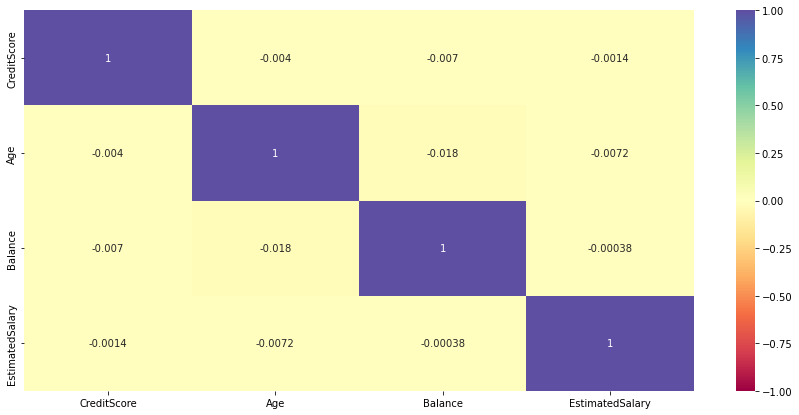

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [182]:
# Plotting Heatmap by creating a 2-D Matrix with correlation plots
correlation = df.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="Spectral")

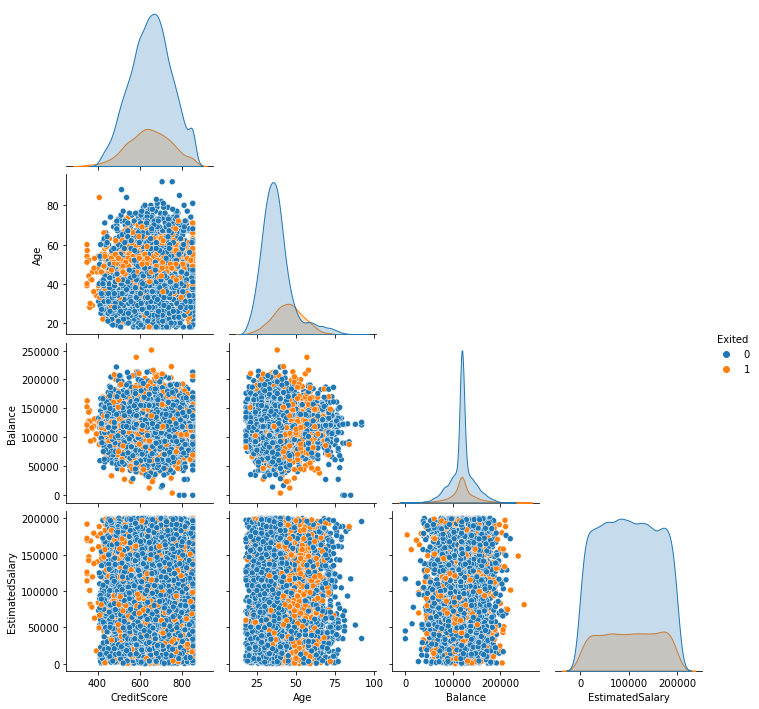

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [183]:
sns.pairplot(df, corner=True, hue="Exited")

<a id='BivariateAnalysis1'></a>

**Observations:**

*[Click to return to TOC](#summary_home)*


* There are no major correlations between the features
* Age seems to have an impact on the exit. There are more customer exist post age of 45
* Age also seems to have an impact on the account balance. The Balance reduces as age increses

**`Age_Grp` vs `EstimatedSalary_Grp`**

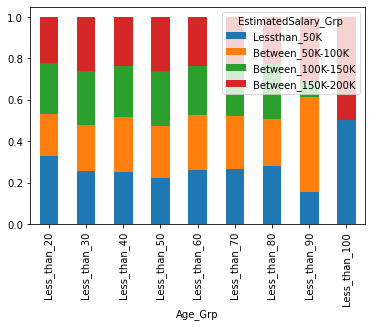

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [184]:
tab = pd.crosstab(df["Age_Grp"], df["EstimatedSalary_Grp"], normalize="index")
tab.plot(kind="bar", stacked=True)
plt.show()

**Observations:**

* As the age group increases the Salary is increasing with experience
* At the max age, some of the salary has dropped and for some its increased to the higher bracket, probably due to passive income

**`Age Group` vs `Geography`**

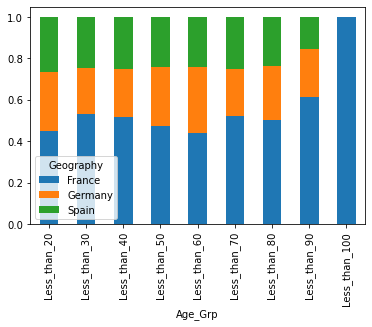

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [185]:
tab = pd.crosstab(df["Age_Grp"], df["Geography"], normalize="index")
tab.plot(kind="bar", stacked=True)
plt.show()

**Observations:**

* France seems to have customers in all age groups. It also has customers aging more than 90 while Germany & Spain has less customers with aging


**`Balance` vs `Number of Products` vs `Exited`**

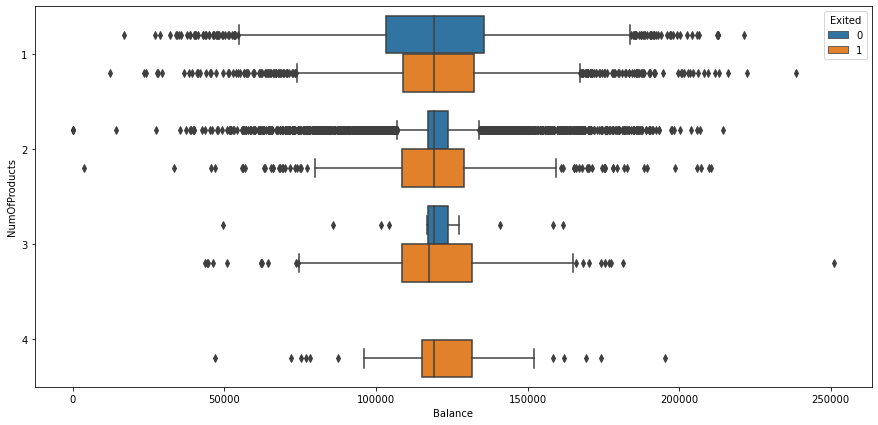

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [186]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Balance", y="NumOfProducts", data=df, hue="Exited")
plt.show()

**Observations:**

* Customers with only 1 product but with higher balance seems to continue with the bank
* Customers with 3 or more products have less account balance and also in the chances of exit
* All customers with more than 4 products have left the bank

**`HasCrCard` vs `Balance` vs `Exited`**

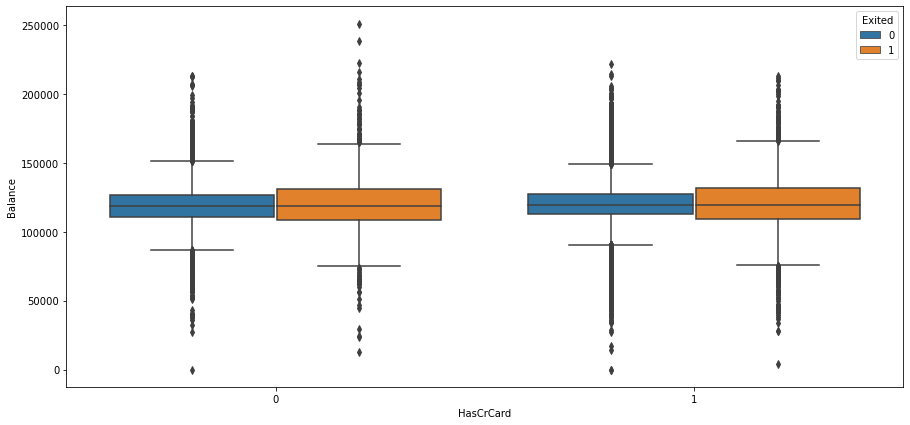

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [187]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="HasCrCard", y="Balance", data=df, hue="Exited")
plt.show()

**Observations:**

* There is not much correlation with Credit cards vs Exit. The account balance seems to be the same with or without cards

**`Age Group` vs `Balance` vs `Exited`**

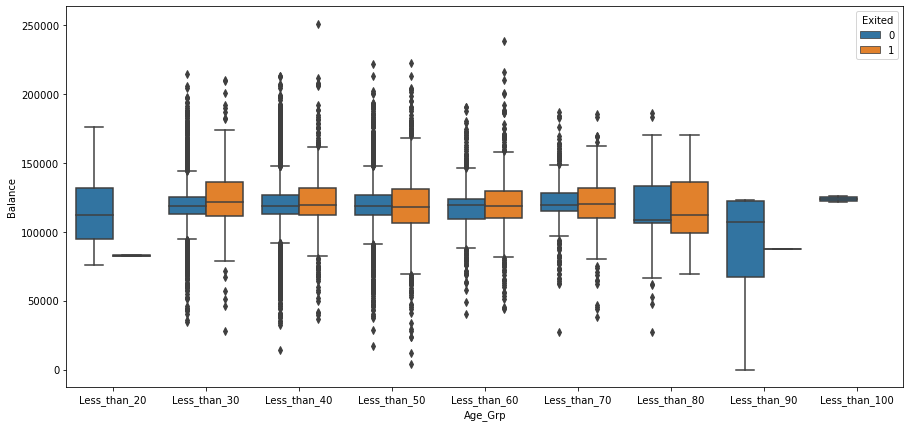

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [188]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Age_Grp", y="Balance", data=df, hue="Exited")
plt.show()

**Observations:**

* Customers seems to exit more as age increases
* The account balance also seems to be decreasing as age increases

**`CreditScore_Grp` vs `Tenure` vs `Balance` vs `Exited`**

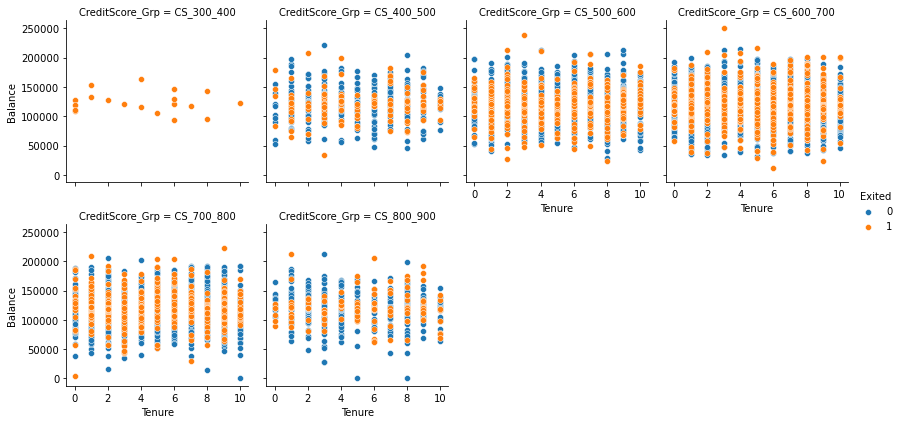

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [189]:
g = sns.FacetGrid(
    df, col="CreditScore_Grp", hue="Exited", col_wrap=4, margin_titles=True
)
g.map(sns.scatterplot, "Tenure", "Balance")
g.add_legend()

**Observations:**

* All Customers with low scores of 300-400 have almost left the bank
* The exit is less when the credit scores are high
* The exit seems to be high for customers with a balance of 100K - 150K


**`NumOfProducts` vs `EstimatedSalary` vs `EstimatedSalary` vs `Exited`**

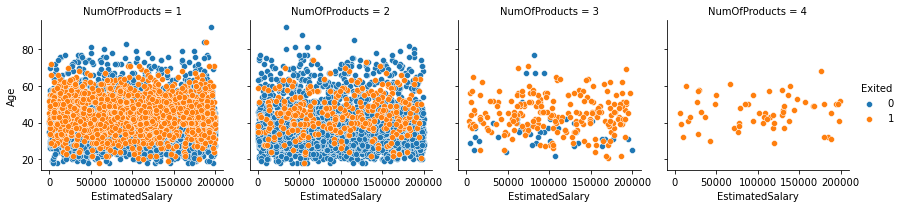

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [190]:
g = sns.FacetGrid(df, col="NumOfProducts", hue="Exited", col_wrap=4, margin_titles=True)
g.map(sns.scatterplot, "EstimatedSalary", "Age")
g.add_legend()

**Observations:**

* Customers in the range of 30-60, seem to be the major set of customers exiting the banks
* Customers with 1 product and in the range of 30-60 seem to be exiting the bank
* Customers with 4 products, have left the bank
* Customers with 2 products seem to be the major customers to continue with the bank

**`NumOfProducts` vs `IsActiveMember` vs `Age` vs `Exited`**

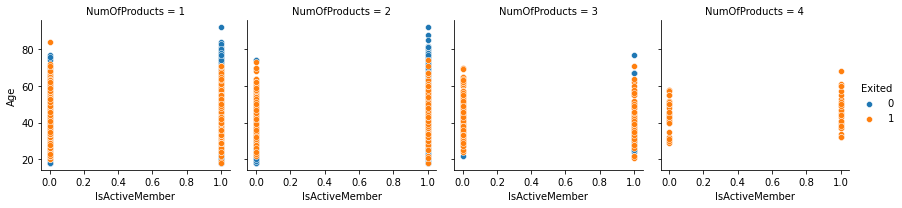

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [191]:
g = sns.FacetGrid(df, col="NumOfProducts", hue="Exited", col_wrap=4, margin_titles=True)
g.map(sns.scatterplot, "IsActiveMember", "Age")
g.add_legend()

**Observations:**

* Customers in the range of 30-60, seem to be the major set of customers exiting the banks
* There isnt much relation with IsActiveMember since we see exits irrespective of the active status

**`CreditScore` vs `NumOfProducts` vs `Gender`**

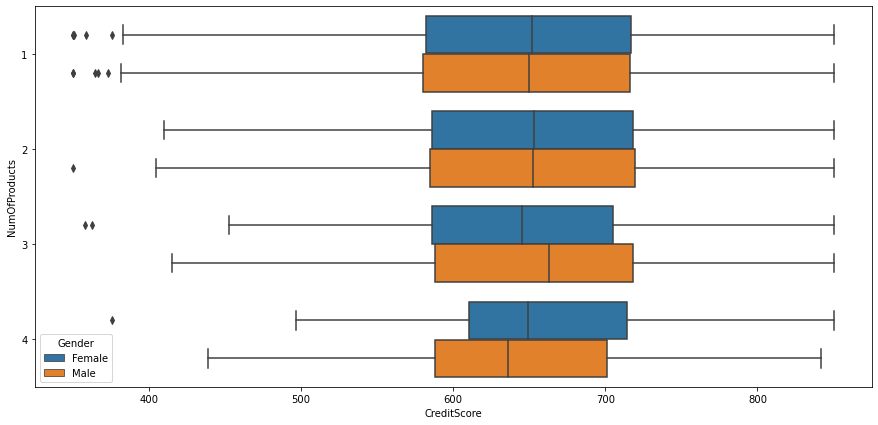

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [192]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="CreditScore", y="NumOfProducts", data=df, hue="Gender")
plt.show()

**Observations**

* Both Male & Female customers seem to have the same range of scores
* Customers with more products seems to have higher scores

---

<a id="model"> </a>

## Model Building

##### *[Click to return to TOC](#summary_home)*

---

<a id="prepmodel"> </a>

## Data Preparation for Modeling
 

---

In [193]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict(predictors) 
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    #target, pred
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score
    
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [194]:
def make_confusion_matrix(
    cf,
    group_names=None,
    categories="auto",
    count=True,
    percent=True,
    cbar=True,
    xyticks=True,
    xyplotlabels=True,
    sum_stats=True,
    figsize=None,
    cmap="Blues",
    title=None,
):
    """
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    """

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ["" for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = [
            "{0:.2%}".format(value) for value in cf.flatten() / np.sum(cf)
        ]
    else:
        group_percentages = blanks

    box_labels = [
        f"{v1}{v2}{v3}".strip()
        for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)
    ]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))

        # if it is a binary confusion matrix, show some more stats
        if len(cf) == 2:
            # Metrics for Binary Confusion Matrices
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2 * precision * recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy, precision, recall, f1_score
            )
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize == None:
        # Get default figure size if not set
        figsize = plt.rcParams.get("figure.figsize")

    if xyticks == False:
        # Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(
        cf,
        annot=box_labels,
        fmt="",
        cmap=cmap,
        cbar=cbar,
        xticklabels=categories,
        yticklabels=categories,
    )

    if xyplotlabels:
        plt.ylabel("True label")
        plt.xlabel("Predicted label" + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [195]:
def validate(model, history, testFlag=False):

    # Capturing learning history per epoch
    plt.plot(history.history["recall"])
    plt.plot(history.history["val_recall"])
    plt.title("Recall vs Epochs")
    plt.ylabel("Recall")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Validation"], loc="lower right")
    plt.show()
    
    model.evaluate(X_train, y_train, verbose=1)
    train_pred = np.round(model.predict(X_train))
    
    model.evaluate(X_val, y_val, verbose=1)
    val_pred = np.round(model.predict(X_val))

    labels = ['True Negative','False Positive','False Negative','True Positive']
    categories = [ 'Not_Fraud','Fraud']

    cm2=confusion_matrix(y_train, train_pred)
    make_confusion_matrix(cm2, group_names=labels, cmap='Blues')

    cm2=confusion_matrix(y_val, val_pred)
    make_confusion_matrix(cm2, group_names=labels, cmap='Blues')

    print("Training Recall Score: " , recall_score(y_train, train_pred))
    print("Validation Recall Score: " , recall_score(y_val, val_pred))
    
    if testFlag:
        model.evaluate(X_test, y_test, verbose=1)
        test_pred = np.round(model.predict(X_test))
        print("Test Recall Score: " , recall_score(y_test, test_pred))
        cm2=confusion_matrix(y_test, test_pred)
        make_confusion_matrix(cm2, group_names=labels, cmap='Blues')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Split Data

In [196]:
# Dropping off the following columns since they will not play a part in determing the model for the customers purchasing the new product
df.drop(["CreditScore_Grp"], axis=1, inplace=True)
df.drop(["Age_Grp"], axis=1, inplace=True)
df.drop(["EstimatedSalary_Grp"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  category
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  category
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  category
dtypes: category(7), float64(2), int64(2)
memory usage: 382.2 KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [198]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,117130.115,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.57,1
3,699,France,Female,39,1,123870.070,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.10,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [199]:
X = df.drop(["Exited"], axis=1)
y = df["Exited"]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [200]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 10) (2000, 10) (2000, 10)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [201]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 4472 to 29
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      6000 non-null   int64   
 1   Geography        6000 non-null   category
 2   Gender           6000 non-null   category
 3   Age              6000 non-null   int64   
 4   Tenure           6000 non-null   category
 5   Balance          6000 non-null   float64 
 6   NumOfProducts    6000 non-null   category
 7   HasCrCard        6000 non-null   category
 8   IsActiveMember   6000 non-null   category
 9   EstimatedSalary  6000 non-null   float64 
dtypes: category(6), float64(2), int64(2)
memory usage: 270.6 KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [202]:
X_train.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4472,660,Germany,Female,23,6,166070.480,2,0,0,90494.72
4034,601,Spain,Female,42,4,96763.890,1,1,1,199242.65
1454,521,Spain,Female,34,7,70731.070,1,1,1,20243.97
9099,738,France,Male,29,2,118627.160,2,1,1,170421.13
2489,714,France,Male,28,6,122724.370,1,1,1,67057.27
9615,692,Spain,Female,47,3,120539.815,2,1,0,150802.41
1452,687,France,Female,35,3,99587.430,1,1,1,1713.10
1515,850,Spain,Male,39,6,133214.130,1,0,1,20769.88
2086,725,Spain,Female,32,0,117307.470,2,1,1,138525.19
7243,634,France,Male,77,5,133086.130,2,1,1,161579.85


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [203]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [204]:
X_train

,CreditScore,Age,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1
4472,660,23,166070.48,90494.72,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4034,601,42,96763.89,199242.65,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
1454,521,34,70731.07,20243.97,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
9099,738,29,118627.16,170421.13,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1
2489,714,28,122724.37,67057.27,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6444,693,37,95900.04,38196.24,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
4806,697,33,87347.70,172524.51,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2622,627,27,185267.45,77027.34,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
203,711,38,129022.06,14374.86,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [205]:
## Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_test)
X_test = sc.transform(X_test)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [206]:
X_train

array([[ 0.09158519, -1.51903358,  1.89430572, ..., -0.08396038,
        -1.54528846, -1.04013825],
       [-0.5163039 ,  0.27998394, -0.92266913, ..., -0.08396038,
         0.64712837,  0.96141066],
       [-1.34056029, -0.47749712, -1.98077629, ..., -0.08396038,
         0.64712837,  0.96141066],
       ...,
       [-0.24842057, -1.14029305,  2.67456892, ..., -0.08396038,
         0.64712837,  0.96141066],
       [ 0.61704864, -0.09875659,  0.38846814, ..., -0.08396038,
         0.64712837,  0.96141066],
       [-2.47391282, -0.95092278, -2.42925051, ..., -0.08396038,
         0.64712837,  0.96141066]])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [207]:
print("Shape of X Training set : ", X_train.shape)
print("Shape of X validation set : ", X_val.shape)
print("Shape of X test set : ", X_test.shape)
print("")

print("Shape of Y Training set : ", y_train.shape)
print("Shape of Y test set : ", y_val.shape)
print("Shape of Y test set : ", y_test.shape)
print("")

print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("")

print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("")

print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of X Training set :  (6000, 22)
Shape of X validation set :  (2000, 22)
Shape of X test set :  (2000, 22)

Shape of Y Training set :  (6000,)
Shape of Y test set :  (2000,)
Shape of Y test set :  (2000,)

Percentage of classes in training set:
0    0.796333
1    0.203667
Name: Exited, dtype: float64

Percentage of classes in validation set:
0    0.796
1    0.204
Name: Exited, dtype: float64

Percentage of classes in test set:
0    0.7965
1    0.2035
Name: Exited, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* The Training, Validation & Testing set has a similar distribution of the classes & uniformly split

---

<a id="evaluation1"> </a>

## Building the model

##### *[Click to return to TOC](#summary_home)*
 

### Model evaluation criterion:

#### The model can make wrong predictions as:
1. Predicting that the customer will stay with the bank but customer leaves the bank services - Loss of resources
2. Predicting a customer will leave the bank but the customer doesn't leave - Loss of opportunity

#### Which case is more important? 
* Predicting that customer will stay with the bank but leaves i.e. losing on a potential source of income for the company because that customer will not be targeted by the marketing team when they should be targeted to retain them.

#### How to reduce this loss i.e need to reduce False Negatives?
* The company wants Recall to be maximized, the greater the Recall lesser the chances of false negatives.

---

<a id="modelorgdata"> </a>

## Model Analysis

##### *[Click to return to TOC](#summary_home)*

---

<a id='model1'></a>

### Model-1 - Basic Modeling

*[Click to return to TOC](#summary_home)*

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1472      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,825
Trainable params: 3,825
Non-trainable params: 0
_________________________________________________________________


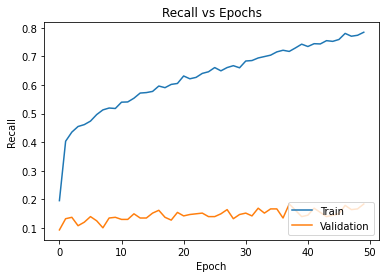

63/63 [==============================] - 0s 880us/step
Training Recall Score:  0.8567921440261865
Validation Recall Score:  0.18382352941176472
63/63 [==============================] - 0s 1ms/step
Test Recall Score:  0.5135135135135135
63/63 [==============================] - 0s 990us/step


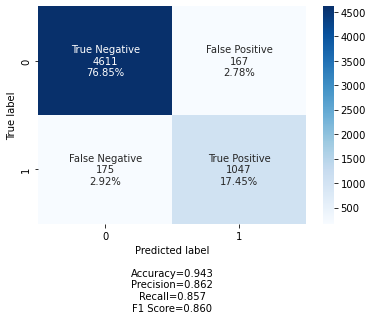

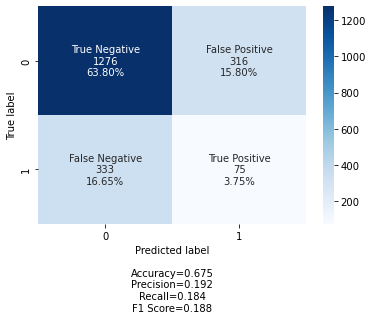

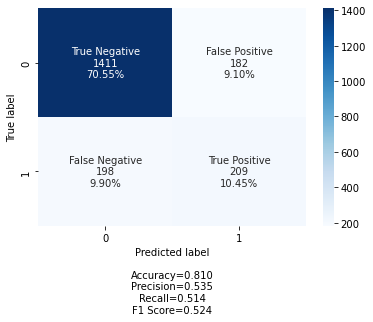

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [208]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
tf.random.set_seed(1)

# Initializing the model
model = Sequential()
# Adding input layer with 64 neurons, relu as activation function.
model.add(Dense(64, activation="relu", input_shape=(22,)))
# Adding the first hidden layer with 32 neurons, relu as activation function
model.add(Dense(32, activation="relu"))
# Adding the second hidden layer with 8 neurons, relu as activation function
model.add(Dense(8, activation="relu"))
# Adding the output layer with one neuron and sigmoid as activation
model.add(Dense(1, activation="sigmoid"))
model.summary()

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["Recall"],
)

# Fitting the model on X_train and y_train with 50 epcohs
history = model.fit(
    X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0
)

validate(model, history, True)
modelTrainDF_Model1 = model_performance_classification_sklearn_with_threshold(
    model, X_train, y_train
)
modelTestDF_Model1 = model_performance_classification_sklearn_with_threshold(
    model, X_test, y_test
)

**Observations**
- This model tuning is a simple tuning with only few layers. This model has a recall score of 85.6% in Training and 51.3% in testing. The accuracy score is 94.3% for training vs the 81% for Test data in this model
- The ROC curver shows that the training & Validation has over fitting and we need to contain it by adding ANN Hyper parameters

---

<a id='model2'></a>

### Model-2 - Basic ReLu with more Layers & Early Stopping Tuning

*[Click to return to TOC](#summary_home)*


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2944      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 16)                5

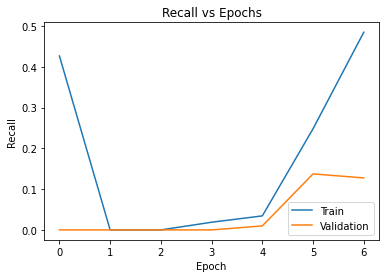

63/63 [==============================] - 0s 1ms/step
Training Recall Score:  0.44680851063829785
Validation Recall Score:  0.12745098039215685
63/63 [==============================] - 0s 1ms/step
Test Recall Score:  0.4250614250614251
63/63 [==============================] - 0s 1ms/step


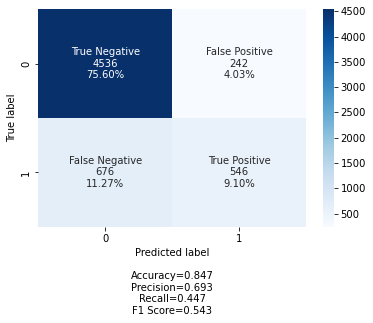

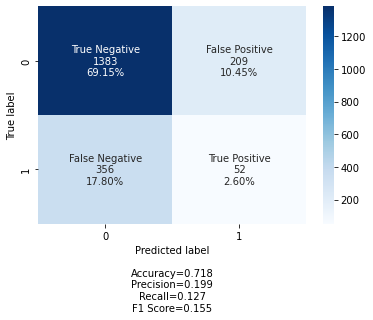

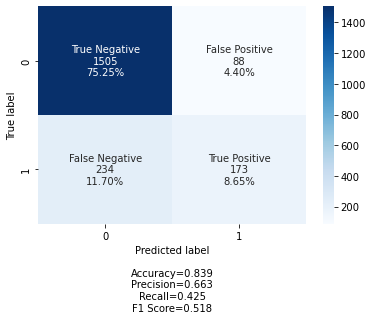

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [209]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
tf.random.set_seed(1)

# Initializing the model
model = Sequential()
# Adding input layer with 128 neurons, relu as activation function
model.add(Dense(128, activation="relu", input_shape=(22,)))
# Adding the first hidden layer with 128 neurons, relu as activation function
model.add(Dense(128, activation="relu"))
# Adding hidden layer with 64 neurons, relu as activation function
model.add(Dense(64, activation="relu"))
# Adding hidden layer with 64 neurons, relu as activation function
model.add(Dense(64, activation="relu"))
# Adding hidden layer with 32 neurons, relu as activation function
model.add(Dense(32, activation="relu"))
# Adding the second hidden layer with 32 neurons, relu as activation function
model.add(Dense(32, activation="relu"))
# Adding the second hidden layer with 16 neurons, relu as activation function
model.add(Dense(16, activation="relu"))
# Adding the second hidden layer with 16 neurons, relu as activation function
model.add(Dense(16, activation="relu"))
# Adding the second hidden layer with 8 neurons, relu as activation function
model.add(Dense(8, activation="relu"))
# Adding the output layer with one neuron and sigmoid as activation
model.add(Dense(1, activation="sigmoid"))
model.summary()

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["Recall"],
)

# With Early Stopping
es_cb = callbacks.EarlyStopping(monitor="recall", min_delta=0.001, patience=5)

# Fitting the model on X_train and y_train with 150 epcohs
history = model.fit(
    X_train,
    y_train,
    epochs=150,
    batch_size=700,
    validation_data=(X_val, y_val),
    callbacks=es_cb,
    verbose=0,
)

validate(model, history, True)
modelTrainDF_Model2 = model_performance_classification_sklearn_with_threshold(
    model, X_train, y_train
)
modelTestDF_Model2 = model_performance_classification_sklearn_with_threshold(
    model, X_test, y_test
)

**Observations**
- This model tuning uses additional layers with early exit. This model has a recall score of 44.6% in Training and 42.5% with test data. The accuracy score is 84.7% for training vs the 83.9% for Test data in this model
- The ROC curver shows that the training & Validation trending better and over fitting at the end

---

<a id='model3'></a>

### Model-3 - SGD with Relu Function, Dropout & BatchNorm. Tuning

*[Click to return to TOC](#summary_home)*


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2944      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                        

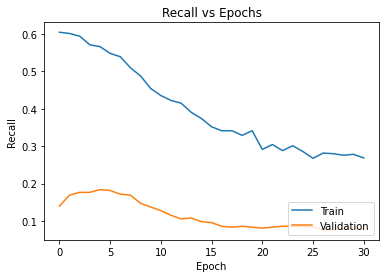

63/63 [==============================] - 0s 1ms/step
Training Recall Score:  0.2774140752864157
Validation Recall Score:  0.0784313725490196
63/63 [==============================] - 0s 1ms/step
Test Recall Score:  0.23587223587223588
63/63 [==============================] - 0s 1ms/step


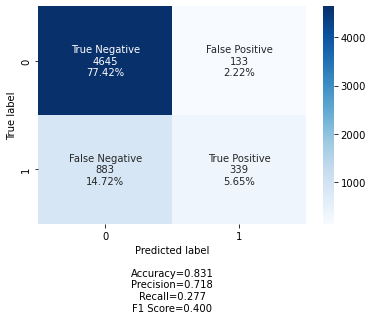

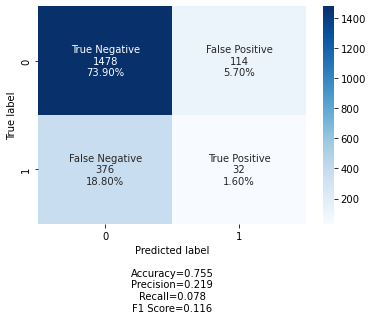

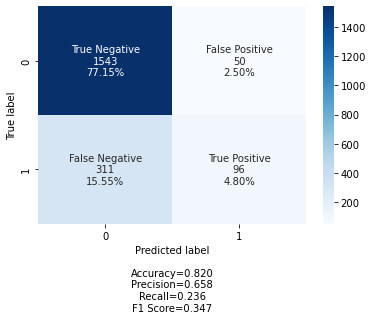

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [210]:

backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
tf.random.set_seed(1)

# Initializing the model
model = Sequential()
# Adding input layer with 128 neurons, relu as activation function and, he_normal as weight initializer.
model.add(Dense(128, activation="relu", kernel_initializer="he_normal", input_shape=(22,)))

# Adding hidden layer with 64 neurons, relu as activation function and, he_normal as weight initializer.
model.add(Dense(64, activation="relu", kernel_initializer="he_normal", ))

# Adding hidden layer with 32 neurons, relu as activation function and, he_normal as weight initializer
model.add(Dense(32, activation="relu", kernel_initializer="he_normal",))
model.add(BatchNormalization())

# Adding hidden layer with 16 neurons, relu as activation function and, he_normal as weight initializer
model.add(Dense(16, activation="relu", kernel_initializer="he_normal",))
model.add(BatchNormalization())

# Adding Dropout with 20%
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Adding hidden layer with 8 neurons, relu as activation function and, he_normal as weight initializer
model.add(Dense(8, activation="relu", kernel_initializer="he_normal",))
model.add(BatchNormalization())

# Adding the output layer with one neuron and sigmoid as activation
model.add(Dense(1, activation="sigmoid"))
model.summary()

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss="binary_crossentropy",
    metrics=["Recall"],
)

# With Early Stopping
es_cb = callbacks.EarlyStopping(monitor="recall", min_delta=0.001, patience=5)

# Fitting the model on X_train and y_train with 150 epcohs 
history = model.fit(
    X_train,
    y_train,
    epochs=150,
    batch_size=700,
    validation_data=(X_val, y_val),
    verbose=0,
    callbacks=es_cb
)

validate(model, history, True)
modelTrainDF_Model3 = model_performance_classification_sklearn_with_threshold(
    model, X_train, y_train
)
modelTestDF_Model3 = model_performance_classification_sklearn_with_threshold(
    model, X_test, y_test
)


**Observations**
- This model tuning uses SGD with RELu function. This model has a recall score of 27.7% in Training and only 23.5% with test data. The accuracy score is 83% for training vs the 82% for Test data in this model
- The ROC curver shows that the training & Validation has over fitting but comparitively the gap is better than the previous one with reduced overfitting

---

<a id='model4'></a>

### Model-4 - Adagrad with TanH Function, Dropout & BatchNorm. Tuning

*[Click to return to TOC](#summary_home)*


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2944      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

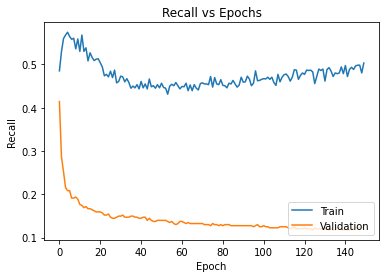

63/63 [==============================] - 0s 1ms/step
Training Recall Score:  0.5564648117839607
Validation Recall Score:  0.12009803921568628
63/63 [==============================] - 0s 1ms/step
Test Recall Score:  0.4520884520884521
63/63 [==============================] - 0s 1ms/step


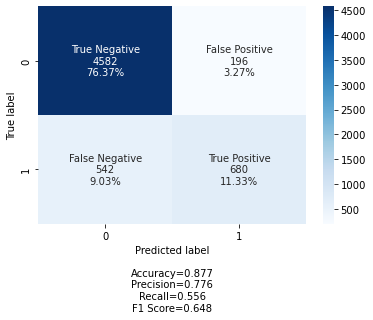

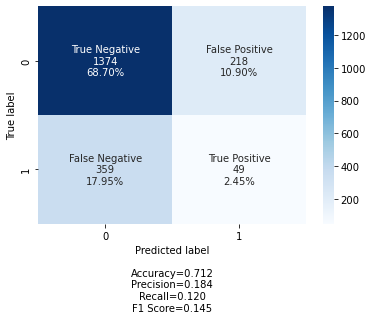

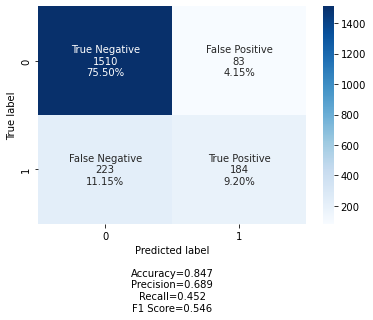

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [211]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
import random

random.seed(1)
tf.random.set_seed(1)
# Initializing the model
model = Sequential()
# Adding input layer with 128 neurons, tanh as activation function and, he_uniform as weight initializer.
model.add(
    Dense(128, activation="tanh", kernel_initializer="he_uniform", input_shape=(22,))
)
# Adding the first hidden layer with 64 neurons, tanh as activation function and, he_uniform as weight initializer
model.add(Dense(64, activation="tanh", kernel_initializer="he_uniform"))

# Adding Dropout with 20%
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Adding the second hidden layer with 32 neurons, tanh as activation function and, he_uniform as weight initializer
model.add(Dense(32, activation="tanh", kernel_initializer="he_uniform"))
model.add(BatchNormalization())

# Adding the second hidden layer with 32 neurons, tanh as activation function and, he_uniform as weight initializer
model.add(Dense(32, activation="tanh", kernel_initializer="he_uniform"))
model.add(BatchNormalization())

# Adding the second hidden layer with 16 neurons, tanh as activation function and, he_uniform as weight initializer
model.add(Dense(16, activation="tanh", kernel_initializer="he_uniform"))
model.add(BatchNormalization())

# Adding the output layer with one neuron and sigmoid as activation
model.add(Dense(1, activation="sigmoid"))

model.summary()

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01),
    loss="binary_crossentropy",
    metrics=["Recall"],
)

# Fitting the model on X_train and y_train with 150 epcohs
history = model.fit(
    X_train,
    y_train,
    epochs=150,
    batch_size=700,
    validation_data=(X_val, y_val),
    verbose=0,
)

validate(model, history, True)
modelTrainDF_Model4 = model_performance_classification_sklearn_with_threshold(
    model, X_train, y_train
)
modelTestDF_Model4 = model_performance_classification_sklearn_with_threshold(
    model, X_test, y_test
)

**Observations**
- This model tuning uses Adagram with TanH function. This model has a recall score of 55.6% in Training and 45.2% with test data. The accuracy score is 87.7% for training vs the 85% for Test data in this model
- The ROC curver shows that the training & Validation has over fitting and it can be tuned further

---

<a id='model5'></a>

### Model-5 - RMS Prop with Relu function, Dropout & Batch Norm.

*[Click to return to TOC](#summary_home)*


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2944      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                        

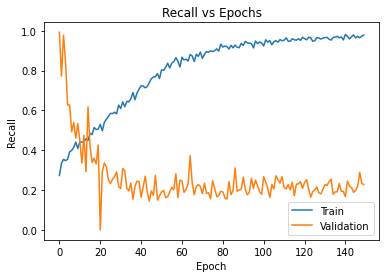

63/63 [==============================] - 0s 2ms/step
Training Recall Score:  0.972176759410802
Validation Recall Score:  0.22794117647058823
63/63 [==============================] - 0s 1ms/step
Test Recall Score:  0.5823095823095823
63/63 [==============================] - 0s 1ms/step


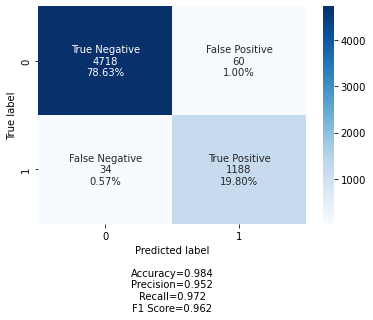

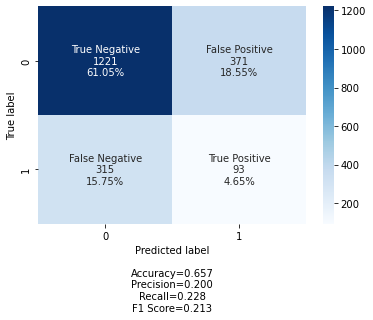

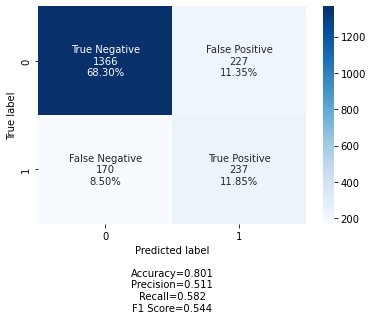

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [212]:

backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
tf.random.set_seed(1)

# Initializing the model
model = Sequential()
# Adding input layer with 128 neurons, relu as activation function and, he_normal as weight initializer.
model.add(Dense(128, activation="relu", kernel_initializer="he_normal", input_shape=(22,)))

# Adding hidden layer with 64 neurons, relu as activation function and, he_normal as weight initializer.
model.add(Dense(64, activation="relu", kernel_initializer="he_normal", ))

# Adding hidden layer with 32 neurons, relu as activation function and, he_normal as weight initializer
model.add(Dense(32, activation="relu", kernel_initializer="he_normal",))

# Adding Dropout with 20%
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Adding hidden layer with 16 neurons, relu as activation function and, he_normal as weight initializer
model.add(Dense(16, activation="relu", kernel_initializer="he_normal",))
model.add(BatchNormalization())

# Adding Dropout with 20%
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Adding hidden layer with 8 neurons, relu as activation function and, he_normal as weight initializer
model.add(Dense(8, activation="relu", kernel_initializer="he_normal",))
model.add(BatchNormalization())

# Adding the output layer with one neuron and sigmoid as activation
model.add(Dense(1, activation="sigmoid"))
model.summary()

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.1),
    loss="binary_crossentropy",
    metrics=["Recall"],
)

# Fitting the model on X_train and y_train with 150 epcohs
history = model.fit(
    X_train,
    y_train,
    epochs=150,
    batch_size=700,
    validation_data=(X_val, y_val),
    verbose=0,
)

validate(model, history, True)
modelTrainDF_Model5 = model_performance_classification_sklearn_with_threshold(
    model, X_train, y_train
)
modelTestDF_Model5 = model_performance_classification_sklearn_with_threshold(
    model, X_test, y_test
)


**Observations**
- This model tuning uses RMS with ReLu function. This model has a recall score of 97.2% in Training and 58.2% with test data. The accuracy score is 98.4% for training vs the 80% for Test data in this model
- The ROC curver shows that the training & Validation is still over fitting but the scores are better than the previous models

---

<a id='model6'></a>

### Model-6 - Adam with TanH Function, Dropout & BatchNorm. Tuning

*[Click to return to TOC](#summary_home)*


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2944      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

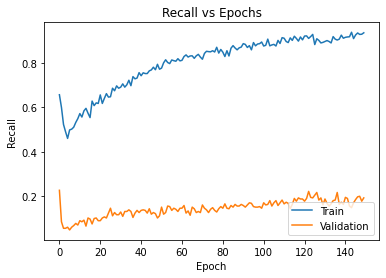

63/63 [==============================] - 0s 1ms/step
Training Recall Score:  0.9811783960720131
Validation Recall Score:  0.19117647058823528
63/63 [==============================] - 0s 1ms/step
Test Recall Score:  0.5036855036855037
63/63 [==============================] - 0s 1ms/step


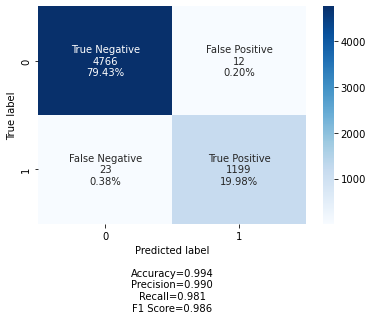

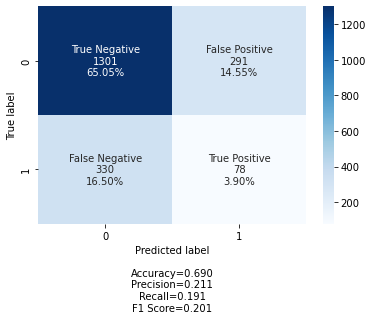

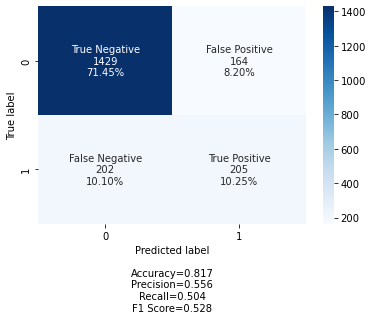

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [213]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
import random

random.seed(1)
tf.random.set_seed(1)
# Initializing the model
model = Sequential()
# Adding input layer with 128 neurons, tanh as activation function and, he_uniform as weight initializer.
model.add(
    Dense(128, activation="tanh", kernel_initializer="he_uniform", input_shape=(22,))
)
# Adding the first hidden layer with 64 neurons, tanh as activation function and, he_uniform as weight initializer
model.add(Dense(64, activation="tanh", kernel_initializer="he_uniform"))

# Adding Dropout with 20%
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Adding the second hidden layer with 32 neurons, tanh as activation function and, he_uniform as weight initializer
model.add(Dense(32, activation="tanh", kernel_initializer="he_uniform"))
model.add(BatchNormalization())

# Adding the second hidden layer with 32 neurons, tanh as activation function and, he_uniform as weight initializer
model.add(Dense(32, activation="tanh", kernel_initializer="he_uniform"))
model.add(BatchNormalization())

# Adding the second hidden layer with 16 neurons, tanh as activation function and, he_uniform as weight initializer
model.add(Dense(16, activation="tanh", kernel_initializer="he_uniform"))
model.add(BatchNormalization())

# Adding the output layer with one neuron and sigmoid as activation
model.add(Dense(1, activation="sigmoid"))

model.summary()

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss="binary_crossentropy",
    metrics=["Recall"],
)

# Fitting the model on X_train and y_train with 150 epcohs
history = model.fit(
    X_train,
    y_train,
    epochs=150,
    batch_size=700,
    validation_data=(X_val, y_val),
    verbose=0,
)

validate(model, history, True)
modelTrainDF_Model6 = model_performance_classification_sklearn_with_threshold(
    model, X_train, y_train
)
modelTestDF_Model6 = model_performance_classification_sklearn_with_threshold(
    model, X_test, y_test
)

**Observations**
- This model tuning uses Adam with TanH function. This model seem to have a recall score of 98.1% in Training and 50.3% with test data. The accuracy score is 99.4% for training vs the 81.7% for Test data in this model
- The ROC curver shows that the training & Validation is still over fitting but the scores are better than the previous models

---

<a id='model7'></a>

### Model-7 - Adam with ReLu Function, Dropout & BatchNorm. Tuning¶

*[Click to return to TOC](#summary_home)*


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2944      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                        

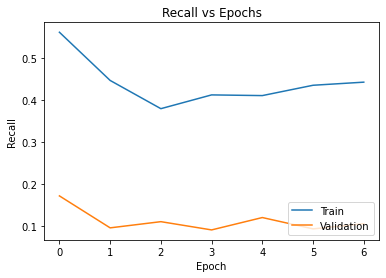

63/63 [==============================] - 0s 1ms/step
Training Recall Score:  0.4590834697217676
Validation Recall Score:  0.1053921568627451
63/63 [==============================] - 0s 1ms/step
Test Recall Score:  0.4103194103194103
63/63 [==============================] - 0s 1ms/step


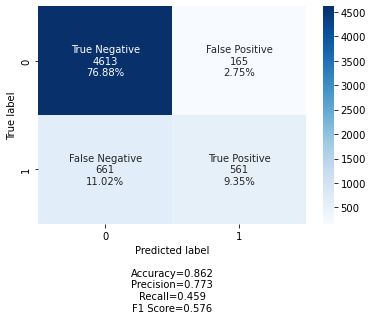

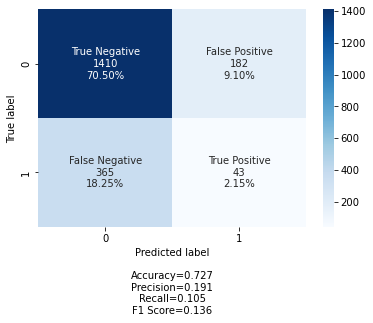

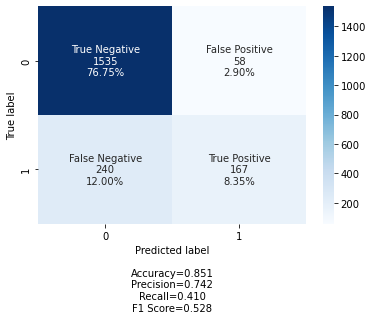

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [214]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
import random

random.seed(1)
tf.random.set_seed(1)
# Initializing the model
model = Sequential()
# Adding input layer with 128 neurons, relu as activation function and, he_normal as weight initializer.
model.add(
    Dense(128, activation="relu", kernel_initializer="he_normal", input_shape=(22,))
)
# Adding the first hidden layer with 64 neurons, relu as activation function and, he_normal as weight initializer
model.add(Dense(64, activation="relu", kernel_initializer="he_normal"))

# Adding Dropout with 20%
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Adding the second hidden layer with 32 neurons, relu as activation function and, he_normal as weight initializer
model.add(Dense(32, activation="relu", kernel_initializer="he_normal"))
model.add(BatchNormalization())

# Adding hidden layer with 32 neurons, relu as activation function and, he_normal as weight initializer
model.add(Dense(32, activation="relu", kernel_initializer="he_normal"))

# Adding Dropout with 20%
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Adding hidden layer with 16 neurons, relu as activation function and, he_normal as weight initializer
model.add(Dense(16, activation="relu", kernel_initializer="he_normal"))
model.add(BatchNormalization())

# Adding the output layer with one neuron and sigmoid as activation
model.add(Dense(1, activation="sigmoid"))

model.summary()

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["Recall"],
)

# With Early Stopping
es_cb = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=5)

# Fitting the model on X_train and y_train with 300 epcohs
history = model.fit(
    X_train,
    y_train,
    epochs=300,
    batch_size=50,
    validation_data=(X_val, y_val),
    callbacks=es_cb,
    verbose=0,
)

validate(model, history, True)
modelTrainDF_Model7 = model_performance_classification_sklearn_with_threshold(
    model, X_train, y_train
)
modelTestDF_Model7 = model_performance_classification_sklearn_with_threshold(
    model, X_test, y_test
)

**Observations**
- This model tuning uses Adam with Relu function. This model seem to have a recall score of 45.9% in Training and 41% with test data. The accuracy score is 86.2% for training vs the 85.1% for Test data in this model
- The ROC curver shows that the training & Validation is still over fitting but the scores are better than the previous models

---

### Comparing the Training vs Testing data

In [215]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        modelTrainDF_Model1.T,
        modelTrainDF_Model2.T,
        modelTrainDF_Model3.T,
        modelTrainDF_Model4.T,
        modelTrainDF_Model5.T,
        modelTrainDF_Model6.T,
        modelTrainDF_Model7.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Model 1 - Less layers with Adam",
    "Model 2 - With Early Stopping Tuning",
    "Model 3 - SGD with Relu Function, Dropout & BatchNorm. Tuning",
    "Model 4 - Adagrad with TanH Function, Dropout & BatchNorm. Tuning",
    "Model 5 - RMSProp with ReLu Function",
    "Model 6 - Adam with TanH Function, Dropout & BatchNorm. Tuning",
    "Model 7 - Adam with ReLu Function, Dropout & BatchNorm. Tuning¶",
]
print("Training performance comparison:")
print(models_train_comp_df.T)

# Testing performance comparison

models_test_comp_df = pd.concat(
    [
        modelTestDF_Model1.T,
        modelTestDF_Model2.T,
        modelTestDF_Model3.T,
        modelTestDF_Model4.T,
        modelTestDF_Model5.T,
        modelTestDF_Model6.T,
        modelTestDF_Model7.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Model 1 - Less layers with Adam",
    "Model 2 - With Early Stopping Tuning",
    "Model 3 - SGD with Relu Function, Dropout & BatchNorm. Tuning",
    "Model 4 - Adagrad with TanH Function, Dropout & BatchNorm. Tuning",
    "Model 5 - RMSProp with ReLu Function",
    "Model 6 - Adam with TanH Function, Dropout & BatchNorm. Tuning",
    "Model 7 - Adam with ReLu Function, Dropout & BatchNorm. Tuning¶",
]

print("\n\n")
print("Testing performance comparison:")
print(models_test_comp_df.T)

Training performance comparison:
                                                    Accuracy    Recall  \
Model 1 - Less layers with Adam                     0.943000  0.856792   
Model 2 - With Early Stopping Tuning                0.847000  0.446809   
Model 3 - SGD with Relu Function, Dropout & Bat...  0.830667  0.277414   
Model 4 - Adagrad with TanH Function, Dropout &...  0.877000  0.556465   
Model 5 - RMSProp with ReLu Function                0.984333  0.972177   
Model 6 - Adam with TanH Function, Dropout & Ba...  0.994167  0.981178   
Model 7 - Adam with ReLu Function, Dropout & Ba...  0.862333  0.459083   

                                                    Precision        F1  
Model 1 - Less layers with Adam                      0.862438  0.859606  
Model 2 - With Early Stopping Tuning                 0.692893  0.543284  
Model 3 - SGD with Relu Function, Dropout & Bat...   0.718220  0.400236  
Model 4 - Adagrad with TanH Function, Dropout &...   0.776256  0.648236  
Mode

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a id='modelcomp'></a>

### Model Performance Comparison:

*[Click to return to TOC](#summary_home)*

Analyzing the performance of each of the models,

   * With Model 1, we see that though the accuracy of the training (94%) & test (81%) results are good, but the recall score has a higher variance (Training 85.7% and Testing 51.3%) probably overfitting 
   * With Model 2 using Early stopping but without any Activation function tuning, we see the recall score at 44.6% training and 42.5% of testing score. The accuracy 84.7% and 83.9% which is also good
   * With Model 3, SGD with Relu Function, Dropout & Batch Norm., the recall score of training is 27.7% and testing is 23.5% which is very low, though the respective accuracy scores are 83% for testing and 82% for training and less overfitting
   * With Model 4, Adagrad with TanH Function, Dropout & Batch. Norm., we see the recall score at 55.6% for training and 45.2% for testing. The accuracy is at 87.7% and 84.7% for training & testing respectively
   * With Model 5, RMSProp with ReLu Function, the recall score of training is 97.2% and testing is 58.2%. There is a lot of variance between the scores and probably overfitting. The respective accuracy scores are 98.4% for testing and 80.1% training
   * With Model 6, Adam with TanH Function, Dropout & Batch Norm., the recall score of training is 98.1% and testing is 50.3%and  the respective accuracy scores are 99.4% for testing and 81.7% for training and less overfitting
   * With Model 7, Adam with Relu Function, Dropout & Batch. Norm., we see the recall score at 45.9% for training and 41.0% for testing. The accuracy is at 86.2% and 85.1% for training & testing respectively
  
### Based on the comparisons, 
    
   **Model 4 seems to have the best recall scores, accuracy & F1 scores with less overfitting, followed by Model 7. Model 6 has good scores too, but it is overfitting.**

         

---

<a id='recommend1'></a>

### Recommendations:

*[Click to return to TOC](#summary_home)*



Based on the Customer Information:

* Almost 80% of the customers are still associated with the bank without exiting
* Most of the customers are from France location (50.1%)
* The Customers ages are ranging from 18 - 92 with average age being 39. 43.5% of the customers fall with in the range of 30-40 age limits, followed by 40-50 years. Almost 75% of the customers are less than the age of 44. 
* The number of years of association with the bank ranges from 0 to 10 years with almost 50% of them associated for 5+ years
* There are 4 products offered by the bank. 51% of customers have taken 1 product and 46% of them have taken 2 products
* 38% of the customers are within the range of 600-700 scores, followed by 700-800 and 500-600 ranges respectively. 50% of the customers are having a score of 652 or more
* 55% of the customers are Male customers compared to Femal customers and 71% of the customers have a credit card with 50% of the customers have more than 100K salary
    
Based on the data patterns of the Customers, we found the following insights that can be leveraged as recommendations for understanding the Customers: 

* Germany seems to have a lot of exit compared with the population of this locations bank customers compared with Spain
* Female customers seems to be exiting more when compared with the gender population and need to provide more focus to address their concerns and keep them engaging
* Tenure of association doesnt seem to have much impact and we see uniform % of around 2% exits across tenure. Irrespective of the tenure, focus needs to be provided to address concerns/requests for all customers 
* Customers with 1 product have an higher exit, similar to products with 3 & 4. Customers with 2 products seems to be staying longer. We need to analyze which products the customers with 2 product count are using and we need to marker it more. Similarly, we need to address the feedback of the other products which might be leading to their exits
* Around 7.3% of active customers have exited while we still have around 35.5% of the inactive customers still associated with the bank. Need to focus on this inactive cutomers to enable them to be actively using the bank services
* Customers in the age group of 30-60 seem to be exiting more when compared with other age groups. Need to focus on the products offered and services rendered to retain them. 
* Customers in the credit scoring of 500-700 seem to be leaving the bank while all Customers with low scores of 300-400 have left the bank. Need to focus on thes low credit score customer to retain them. With 600-700 being  a good score, need to look at offering more products for these customers to retain them
* Customers with higher balance seem to have exited the bank than those with low balance, especially high for customers with a balance of 100K - 150K. Need to focus on the high balance customers to offer them better services and suitable products
* Customers with only 1 product but with higher balance seems to continue with the bank. Customers with 3 or more products have less account balance and also in the chances of exit. All customers with more than 4 products have left the bank. Customers in this patten can be approached

 

---

*[Click to return to TOC](#summary_home)*

---